# Progetto business intelligence
L'obiettivo del progetto è estrrre informazioni da recensioni Amazon di prodotti appartenenti a 4 categorie di prodotto per un'applicazione Business

## Importazione librerie e dataset

### Importazione librerie

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importazione dataset

In [2]:
path='dataset34.csv'
with open(path) as f:
    original_df=pd.read_csv(f)
original_df

reviewerID        asin                 reviewerName helpful  \
0     A2QGOE9VHBNPKS  B005188T90                  Outdoor Fun  [2, 2]   
1     A10YMY9ZUFBL1P  B000NJHD1W              Dont Be a Troll  [2, 2]   
2     A2TKLBP7VJR2US  B006QF3TW4            Mark Alan Piegols  [2, 2]   
3     A1NJR3LIISIRHQ  B000S5ODN2                      William  [0, 0]   
4     A383DI3P3DUFTQ  B0064VEUNM                  nocoolnames  [3, 3]   
...              ...         ...                          ...     ...   
3995  A3JAGTCZ5FLMNJ  B0002AHY6Q  AtilaTheHoney AtilaTheHoney  [0, 0]   
3996  A141834NWN0SKH  B005LMJUDU                      MJW MJW  [0, 0]   
3997   A5YYEE79CTAE6  B00HDPZCH6                     Lawrence  [0, 0]   
3998  A3KAZJVITGQ369  B0015R3AAO               Berin Loritsch  [0, 1]   
3999   ALGI34BYWIXZG  B00I471LR2              Nishant Agarwal  [0, 1]   

                                             reviewText  overall  \
0     These can be found at target for about 18 but ...      5.0   
1     I purchased these about 2 weeks ago and I real...      5.0   
2     If you are thirsty and do not want to wait for...      4.0   
3     Paracord is a nice addition to any camping bac...      4.0   
4     This defiantly works better than plain old clp...      5.0   
...                                                 ...      ...   
3995  I hate to floss This makes that a none issue J...      5.0   
3996  These little cases keep your batteries in a co...      5.0   
3997  I was very skeptical at first about spending m...      5.0   
3998  Not sure how to really review multivitamins bu...      4.0   
3999  Love the cordless feature Great quality Works ...      5.0   

                                      summary  unixReviewTime   reviewTime  \
0                               Great cookset      1375660800   08 5, 2013   
1     Great just wish there were heavier ones      1291075200  11 30, 2010   
2             Easy way to clean water quickly      1377561600  08 27, 2013   
3                            It is what it is      1364688000  03 31, 2013   
4                                 Good grease      1331510400  03 12, 2012   
...                                       ...             ...          ...   
3995                                   OH YES      1382832000  10 27, 2013   
3996                            Handy Storage      1371686400  06 20, 2013   
3997                                    Great      1401667200   06 2, 2014   
3998          Its a pretty solid multivitamin      1391212800   02 1, 2014   
3999                            Great product      1397779200  04 18, 2014   

      label  
0         5  
1         5  
2         5  
3         5  
4         5  
...     ...  
3995      8  
3996      8  
3997      8  
3998      8  
3999      8  

[4000 rows x 10 columns]

## Preprocessing
Bisogna preprocessare i dati per renderli utilizzabili dagli algoritmi di data science. In particolare dobbiamo:
- gestire i valori mancanti
- convertire in oggetto *date* le date forniteci
- gestire i valori nominali 
- vettorizzare i dati testuali

### Missing values
Per prima cosa gestiamo i *valori mancanti*

In [3]:
def which(bool_mat):
    #funzione che ritorna la lista delle coppie di indici in cui la matrice booleana è vera
    n_rows,n_cols=np.shape(bool_mat)
    rows=np.arange(n_rows)
    cols=np.arange(n_cols)
    cols,rows=np.meshgrid(cols,rows)
    row=rows[bool_mat]
    col=cols[bool_mat]
    return list(zip(row,col))

nan_indices=which(pd.isna(original_df))
len(nan_indices)

41

Notiamo che molti dei valori mancanti sono nella colonna 2 ovvero quella corrispondente al valore 'reviewerName'. Tratteremo questi valori mancanti chiamandoli 'Amazon Customer'	 

In [4]:
nan2_rows=[i[0] for i in nan_indices if i[1]==2]
original_df.iloc[nan2_rows,2]='Amazon Customer'

nan_indices=which(pd.isna(original_df))
nan_indices


[(272, 4), (2697, 6), (2794, 4)]

Ora dobbiamo gestire di gestire due recensioni mancanti e un riassunto della recensione mancante.
Per quanto riguarda le recensioni mancanti salviamo nell'attributo recensione il valore corrispondente all'attributo *Summary* della stessa recensione

In [5]:
nan4_rows=[i[0] for i in nan_indices if i[1]==4]
original_df.iloc[nan4_rows,4]=original_df.iloc[nan4_rows,6]
original_df.iloc[nan4_rows,4]

272            Problem with Sheath  Knife Seems Excellent
2794    See my video review for a demonstration of how...
Name: reviewText, dtype: object

Facciamo un riassunto della recensione per l'unico elemento di *Summary* mancante

In [6]:
nan_indices=which(pd.isna(original_df))
nan6_rows=[i[0] for i in nan_indices if i[1]==6]
original_df.iloc[nan6_rows[0],4]


'my front and back dont match The back is like the picture only matte instead of shiny and the front is like some weird yellowy leopard not super cute but Im going to use it until I can find a tpu leopard case I like'

In [7]:
original_df.iloc[nan6_rows[0],6]='my front and back dont match'
original_df.iloc[nan6_rows[0],6]

'my front and back dont match'

### Date
Salviamo le date come date come oggetto *date* di python

In [8]:
df=original_df
from datetime import datetime
def to_date(string):
    string=''.join(string.split(','))
    (month, day, year)=string.split(' ')
    return (int(year), int(month), int(day))

def series_to_date(series):
    dates=[]
    for date in series:
        (year,month,day)=to_date(date)
        dates.append(datetime(year=year,month=month,day=day))
    return pd.Series(dates)
     
#series_to_date(df['reviewTime'])
df['reviewTime']=series_to_date(original_df['reviewTime'])
df['reviewTime']
#datetime.fromisocalendar(year, week, day)

0      2013-08-05
1      2010-11-30
2      2013-08-27
3      2013-03-31
4      2012-03-12
          ...    
3995   2013-10-27
3996   2013-06-20
3997   2014-06-02
3998   2014-02-01
3999   2014-04-18
Name: reviewTime, Length: 4000, dtype: datetime64[ns]

In [9]:
max(df['reviewTime'])

Timestamp('2014-07-22 00:00:00')

Controlliamo se l'attributo *unixReviewTime* ci dà ulteriori informazioni rispetto all'attributo *reviewTime*.

In [10]:
df[df['unixReviewTime']%(60*60*24)!=0]

Empty DataFrame
Columns: [reviewerID, asin, reviewerName, helpful, reviewText, overall, summary, unixReviewTime, reviewTime, label]
Index: []

Non sembrano esserci non multipli di 24ore x 60minuti x 60secondi quindi non ci fornisce informazioni su intervalli di tempo inferiori a una giornata. L'attributo è quindi inutile, lo cancello.

In [11]:
df = original_df.drop(columns=['unixReviewTime'])
df

reviewerID        asin                 reviewerName helpful  \
0     A2QGOE9VHBNPKS  B005188T90                  Outdoor Fun  [2, 2]   
1     A10YMY9ZUFBL1P  B000NJHD1W              Dont Be a Troll  [2, 2]   
2     A2TKLBP7VJR2US  B006QF3TW4            Mark Alan Piegols  [2, 2]   
3     A1NJR3LIISIRHQ  B000S5ODN2                      William  [0, 0]   
4     A383DI3P3DUFTQ  B0064VEUNM                  nocoolnames  [3, 3]   
...              ...         ...                          ...     ...   
3995  A3JAGTCZ5FLMNJ  B0002AHY6Q  AtilaTheHoney AtilaTheHoney  [0, 0]   
3996  A141834NWN0SKH  B005LMJUDU                      MJW MJW  [0, 0]   
3997   A5YYEE79CTAE6  B00HDPZCH6                     Lawrence  [0, 0]   
3998  A3KAZJVITGQ369  B0015R3AAO               Berin Loritsch  [0, 1]   
3999   ALGI34BYWIXZG  B00I471LR2              Nishant Agarwal  [0, 1]   

                                             reviewText  overall  \
0     These can be found at target for about 18 but ...      5.0   
1     I purchased these about 2 weeks ago and I real...      5.0   
2     If you are thirsty and do not want to wait for...      4.0   
3     Paracord is a nice addition to any camping bac...      4.0   
4     This defiantly works better than plain old clp...      5.0   
...                                                 ...      ...   
3995  I hate to floss This makes that a none issue J...      5.0   
3996  These little cases keep your batteries in a co...      5.0   
3997  I was very skeptical at first about spending m...      5.0   
3998  Not sure how to really review multivitamins bu...      4.0   
3999  Love the cordless feature Great quality Works ...      5.0   

                                      summary reviewTime  label  
0                               Great cookset 2013-08-05      5  
1     Great just wish there were heavier ones 2010-11-30      5  
2             Easy way to clean water quickly 2013-08-27      5  
3                            It is what it is 2013-03-31      5  
4                                 Good grease 2012-03-12      5  
...                                       ...        ...    ...  
3995                                   OH YES 2013-10-27      8  
3996                            Handy Storage 2013-06-20      8  
3997                                    Great 2014-06-02      8  
3998          Its a pretty solid multivitamin 2014-02-01      8  
3999                            Great product 2014-04-18      8  

[4000 rows x 9 columns]

### Nominal values
Uso one-hot encoding per salvare il *label*

In [12]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, dtype=int)
ohe.fit(df.loc[:,['label']])
label_ohe = ohe.transform(df.loc[:,['label']])

categories=['sports & outodoors',
            'film & TV',
            'cellulari e accessori',
            'salute e cura della persona'
           ]

cats_df=pd.DataFrame(label_ohe, columns=categories)

df_new=df.drop(columns=['label'])
df_new=pd.concat((df_new,cats_df),axis=1)
df=df_new
dataset=df

### Dati testuali
Ci sono vari passaggi da fare per rendere un documento testuale utile per degli algoritmi di data mining. In particolare dobbiamo
- rendere tutte le lettere minuscole
- rimuovere la punteggiatura
- rimuovere le stopwords
- tokenizzare
- stemming
- applicare tf-ifd

L'ordine descritto precedentemente è quello che ci è risultato più naturale usando le funzioni delle librerie *nltk* e *sklearn*

In [13]:
# in questa casella scrivo le funzioni che usero in seguito per il preprocessing dei dati testuali

#rendo minuscolo
def to_lower(string):
    if isinstance(string, str):
        return " ".join([word.lower() for word in string.split()])
    else: 
        return ' '

def series_to_lower(series):
    return series.apply(to_lower)

#rimuovo la punteggiatura
import re
def remove_punct(series):
    series=series.apply(lambda x: ''.join(re.findall(r'[a-zA-Z+""]',x)))

#rimuovo stopwords
import nltk
nltk.download('stopwords') 
from nltk.corpus import stopwords

def rem_stopwords(series):
    allstopwords=stopwords.words('english')
    return series.apply(lambda x: " ".join(i for i in x.split() if i not in allstopwords))

#tokenizzare il documento
def tokenize_series(series):
    return series.apply(nltk.word_tokenize)
 
# operazione inversa di tokenizzare
def join_series(series):
    return series.apply(' '.join)

# stemming
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

from nltk.stem import PorterStemmer
def stemmed_series(series):
    series=tokenize_series(series)
    series=series.apply(lambda x: [PorterStemmer().stem(word) for word in x])
    return join_series(series)

#vettorizzazione
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

def vectorizer(series,type='tf-idf',ngram_range=(1,1)):
    
    vectorizer=TfidfVectorizer(ngram_range=ngram_range)
    if type=='count':
        vectorizer=CountVectorizer(ngram_range=ngram_range)       
    count=vectorizer.fit_transform(series).toarray()    
    return pd.DataFrame(data=count, columns = vectorizer.get_feature_names_out() )



#lemming
def lemmatizer(text):
    lemm_text = [WordNetLemmatizer().lemmatize(word) for word in text]
    return lemm_text

def lemmed_series(series):
    return series.apply(lambda x:lemmatizer(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/simonechiominto/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/simonechiominto/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/simonechiominto/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/simonechiominto/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Applico quindi i vari passaggi:
- rendo minuscolo

In [14]:
df['summary']=series_to_lower(df['summary'])
df['reviewText']=series_to_lower(df['reviewText'])

- rimuovo le stopwords

In [15]:
df['summary']=rem_stopwords(df['summary'])
df['reviewText']=rem_stopwords(df['reviewText'])

- tokenizzo

In [16]:
df_tokenized= df.copy()
df_tokenized['reviewText']=tokenize_series(df['reviewText'])
df_tokenized['summary']=tokenize_series(df['summary'])

- applico stemming

In [17]:
df['reviewText']=stemmed_series(df['reviewText'])
df['summary']=stemmed_series(df['summary'])

- vettorizzo tramite tf-idf vectorizer

In [18]:
df_tfidf_review=vectorizer(df['reviewText'])
df_tfidf_summary=vectorizer(df['summary'])

In [19]:
# 'reviewerID','asin' ci servono come chiavi del database
df_tfidf_review=pd.concat((df[['reviewerID','asin']],df_tfidf_review),axis=1)
df_tfidf_summary=pd.concat((df[['reviewerID','asin']],df_tfidf_summary),axis=1)

In [20]:
df_tfidf_summary

reviewerID        asin   10  100  1000mg  1020  10speed   11   12  \
0     A2QGOE9VHBNPKS  B005188T90  0.0  0.0     0.0   0.0      0.0  0.0  0.0   
1     A10YMY9ZUFBL1P  B000NJHD1W  0.0  0.0     0.0   0.0      0.0  0.0  0.0   
2     A2TKLBP7VJR2US  B006QF3TW4  0.0  0.0     0.0   0.0      0.0  0.0  0.0   
3     A1NJR3LIISIRHQ  B000S5ODN2  0.0  0.0     0.0   0.0      0.0  0.0  0.0   
4     A383DI3P3DUFTQ  B0064VEUNM  0.0  0.0     0.0   0.0      0.0  0.0  0.0   
...              ...         ...  ...  ...     ...   ...      ...  ...  ...   
3995  A3JAGTCZ5FLMNJ  B0002AHY6Q  0.0  0.0     0.0   0.0      0.0  0.0  0.0   
3996  A141834NWN0SKH  B005LMJUDU  0.0  0.0     0.0   0.0      0.0  0.0  0.0   
3997   A5YYEE79CTAE6  B00HDPZCH6  0.0  0.0     0.0   0.0      0.0  0.0  0.0   
3998  A3KAZJVITGQ369  B0015R3AAO  0.0  0.0     0.0   0.0      0.0  0.0  0.0   
3999   ALGI34BYWIXZG  B00I471LR2  0.0  0.0     0.0   0.0      0.0  0.0  0.0   

      120  ...  yugo  yum  yummi  yup  zak  zero  zeu  zipper  zombi  zyrtec  
0     0.0  ...   0.0  0.0    0.0  0.0  0.0   0.0  0.0     0.0    0.0     0.0  
1     0.0  ...   0.0  0.0    0.0  0.0  0.0   0.0  0.0     0.0    0.0     0.0  
2     0.0  ...   0.0  0.0    0.0  0.0  0.0   0.0  0.0     0.0    0.0     0.0  
3     0.0  ...   0.0  0.0    0.0  0.0  0.0   0.0  0.0     0.0    0.0     0.0  
4     0.0  ...   0.0  0.0    0.0  0.0  0.0   0.0  0.0     0.0    0.0     0.0  
...   ...  ...   ...  ...    ...  ...  ...   ...  ...     ...    ...     ...  
3995  0.0  ...   0.0  0.0    0.0  0.0  0.0   0.0  0.0     0.0    0.0     0.0  
3996  0.0  ...   0.0  0.0    0.0  0.0  0.0   0.0  0.0     0.0    0.0     0.0  
3997  0.0  ...   0.0  0.0    0.0  0.0  0.0   0.0  0.0     0.0    0.0     0.0  
3998  0.0  ...   0.0  0.0    0.0  0.0  0.0   0.0  0.0     0.0    0.0     0.0  
3999  0.0  ...   0.0  0.0    0.0  0.0  0.0   0.0  0.0     0.0    0.0     0.0  

[4000 rows x 3433 columns]

In [21]:
def preproc(df):
    df['reviewText']=series_to_lower(df['reviewText'])
    df['reviewText']=stemmed_series(df['reviewText'])
    return vectorizer(df['reviewText'])   

## Visualizzazioni
In primis scriviamo una funzione che data una series con dati testuali estrae una *nuvola di parole*

In [22]:
from wordcloud import WordCloud 

def print_wordcloud(series, sentiment='y'):   
    from wordcloud import STOPWORDS 
    STOPWORDS=list(STOPWORDS)
    sent_words=['great','good','love','best', 'perfect','excel','nice','awesom','better','realli','one','use','product','work','well','much']
    if sentiment=='n':
        STOPWORDS=STOPWORDS+sent_words
    words = []
    series=tokenize_series(series)
    for message in series:
        words.extend([word for word in message if word not in STOPWORDS])
        
    wordcloud = WordCloud(width = 1000, height = 500,colormap='plasma',mode='RGBA',background_color=None).generate(" ".join(words))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    return wordcloud


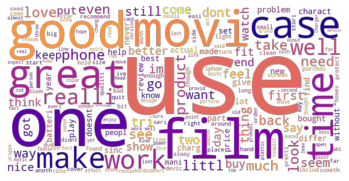

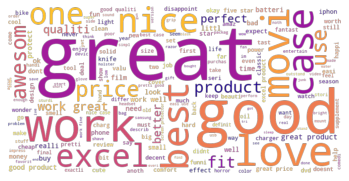

In [23]:
#print_wordcloud(df['summary'],'n')
im=print_wordcloud(df['reviewText'])
im.to_file('text_word_cloud.png')
#print_wordcloud(df['reviewText'],'n')
im=print_wordcloud(df['summary'])
im.to_file('summary_word_cloud.png')

Visualizziamo le word cloud separatemante per ogni categoria

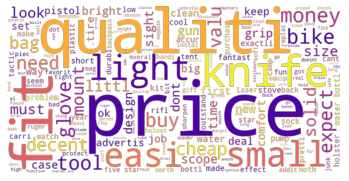

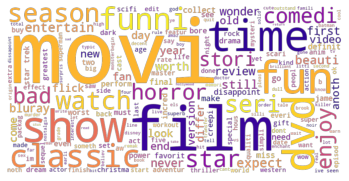

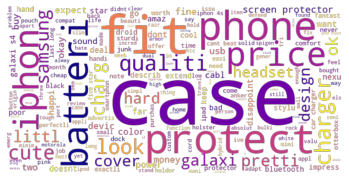

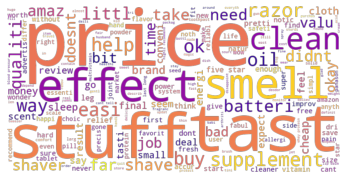

In [24]:
print_wordcloud(df.loc[(df['sports & outodoors']==1),'summary'],'n')
#wc.to_file('sports_word_cloud.png')
print_wordcloud(df.loc[(df['film & TV']==1),'summary'],'n')
#wc.to_file('film_word_cloud.png')
print_wordcloud(df.loc[(df['cellulari e accessori']==1),'summary'],'n')
#wc.to_file('phone_word_cloud.png')
print_wordcloud(df.loc[(df['salute e cura della persona']==1),'summary'],'n')
#wc.to_file('health_word_cloud.png')

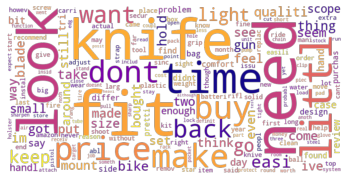

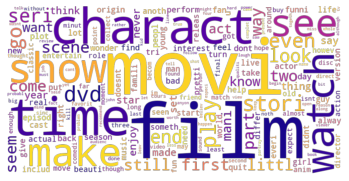

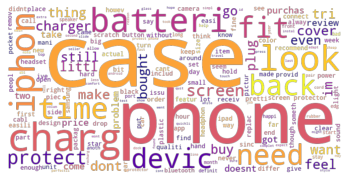

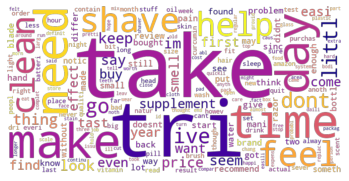

In [25]:
wc=print_wordcloud(df.loc[(df['sports & outodoors']==1),'reviewText'],'n')
#wc.to_file('sports_word_cloud.png')
wc=print_wordcloud(df.loc[(df['film & TV']==1),'reviewText'],'n')
#wc.to_file('film_word_cloud.png')
wc=print_wordcloud(df.loc[(df['cellulari e accessori']==1),'reviewText'],'n')
#wc.to_file('phone_word_cloud.png')
wc=print_wordcloud(df.loc[(df['salute e cura della persona']==1),'reviewText'],'n')
#wc.to_file('health_word_cloud.png')

## Analisi univariata
Bisogna mettere:
- istogrammi di tempo: anno, giorno settimana
- distribuzione delle stellette
- distribuzione di recensioni per prodotto
- distribuzione di recensioni per utente

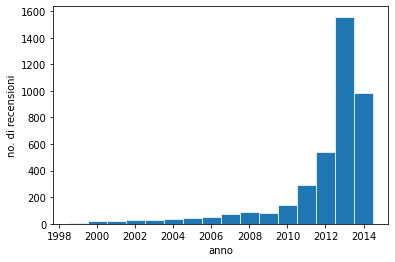

In [26]:
z = np.array([date.year for date in df['reviewTime']])
x=list(set(z))
y=[sum(z==month) for month in x]

fig, ax = plt.subplots()

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
ax.set_ylabel('no. di recensioni')
ax.set_xlabel('anno')

#fig.savefig("hist_year.png")
plt.show()

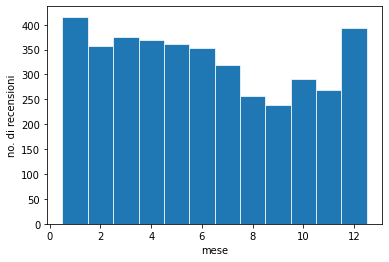

In [27]:
z = np.array([date.month for date in df['reviewTime']])
x=list(set(z))
y=[sum(z==month) for month in x]

fig, ax = plt.subplots()
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

ax.set_ylabel('no. di recensioni')
ax.set_xlabel('mese')
#fig.savefig("hist_month.png")

plt.show()

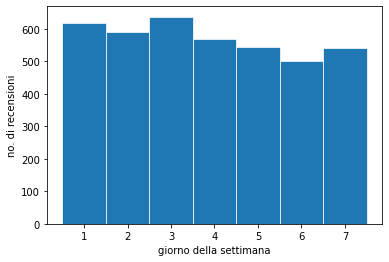

In [28]:
z = np.array([date.isoweekday() for date in df['reviewTime']])
#monday=1,...#sunday=7
x=list(set(z))
y=[sum(z==month) for month in x]

fig, ax = plt.subplots()

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
ax.set_ylabel('no. di recensioni')
ax.set_xlabel('giorno della settimana')

#fig.savefig("hist_day.png")
plt.show()

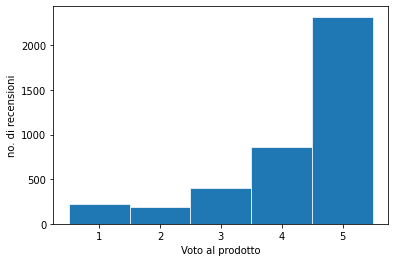

In [29]:
z = np.array(df['overall'])
x=list(set(z))
y=[sum(z==month) for month in x]

fig, ax = plt.subplots()

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
ax.set_ylabel('no. di recensioni')
ax.set_xlabel('Voto al prodotto')
#fig.savefig("hist_overall.png")

plt.show()

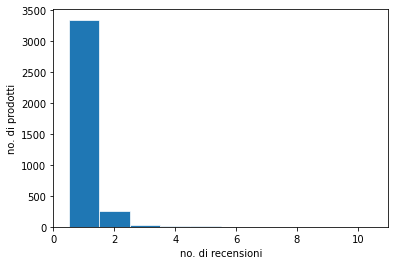

In [30]:
z=df['asin']

x=np.array(list(set(df['asin'])))
y=np.array([sum(z==month) for month in x])

fig, ax = plt.subplots()
x=np.array(list(set(y)))
y=[sum(y==month) for month in x]

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
ax.set_ylabel('no. di prodotti')
ax.set_xlabel('no. di recensioni')

#fig.savefig("hist_products.png")
plt.show()

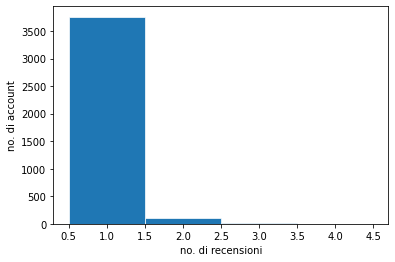

In [31]:
z=df['reviewerID']
x=np.array(df['reviewerID'])
accounts=list(set(x))

n_reviews=np.array([sum(x==account) for account in accounts])
x=list(set(n_reviews))
y=np.array([sum(n_reviews==el) for el in x])

fig, ax = plt.subplots()
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
ax.set_ylabel('no. di account')
ax.set_xlabel('no. di recensioni')

#fig.savefig("hist_account.png")

plt.show()

41
41


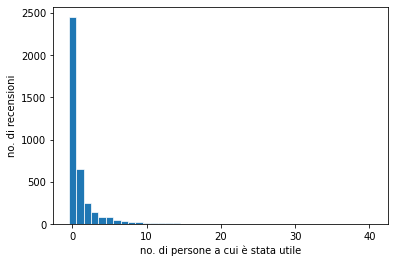

In [32]:
def clean(df):
    data=df['helpful']
    y=[]
    for i in data:
        y.append(int(i.replace('[','').replace(']','').replace(',','').split()[0]))
    y=np.array(y)
    df['helpful']=y
    return df


df_appo=clean(df)
z=df_appo['helpful']

x=list(range(0,41))
print(len(x))
y=[sum(z==i) for i in x]
print(len(y))

fig, ax = plt.subplots()
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
ax.set_ylabel('no. di recensioni')
ax.set_xlabel('no. di persone a cui è stata utile')

#fig.savefig("hist_helpful.png")

plt.show()

# PCA

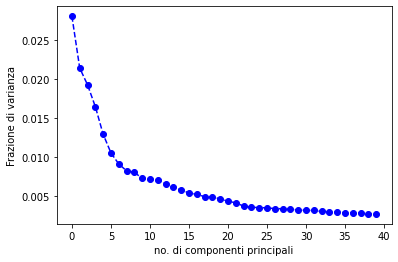

In [33]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib as lib
scaler = preprocessing.StandardScaler()
Y=[]
X=df_tfidf_summary.iloc[:,2:]


pca = PCA(n_components=40)
pca.fit_transform(X)

fig, ax = plt.subplots()

ax.set_ylabel('Frazione di varianza')
ax.set_xlabel('no. di componenti principali')
ax.plot(range(0,40),pca.explained_variance_ratio_ ,'bo',linestyle='dashed')

#fig.savefig("pca_summary.png")

plt.show()

## Data mining

In questa sezione applichiamo diversi algoritmi di clustering ai dati testuali estratti dagli attributi *Summary* e *textReview*.

In particolare vedremo gli algoritmi
- k-means
- bisecting k-means
- clustering gerarchico agglomerativo
- DB Scan

Applicheremo gli algoritmi sia all'intero dataset sia all'interno delle singole categorie

In [34]:
#adesso proviamo a fare clustering sull'intero dataset
from sklearn import preprocessing  # to normalise existing X
from sklearn.cluster import KMeans, BisectingKMeans#, KMeans


def get_clusters(X,n_clusters,method='k-means',distance='euclidean',random_state=0,n_iter=10):
    
    SSE=1000000000
    if distance=='cosine':
        X=preprocessing.normalize(X)
    for i in range(n_iter):
        #print(f'numero di iterazione dell\'algoritmo è {i+1}')
        random_state=random_state+1
        
        if method=='k-means':
            clust_algo = KMeans(n_clusters=n_clusters, random_state=random_state)
            clust_algo.fit(X)
            #print(clust_algo.inertia_)
        elif method=='BisectingKMeans':
            clust_algo = BisectingKMeans(n_clusters=n_clusters, random_state=random_state)
            clust_algo.fit(X)
            
        if clust_algo.inertia_<SSE:
            SSE=clust_algo.inertia_
            clusters = clust_algo.labels_
    
    return clusters,SSE,clust_algo.cluster_centers_

def print_SSE(X,n_values,method='k-means',distance='euclidean',random_state=0,n_iter=5):
    SSE=[]
    clusters=[]
    for i,n_clusters in enumerate(n_values):
        print(f'{i+1} di {len(n_values)}')
        clust,err=get_clusters(X,n_clusters,method=method,distance=distance,random_state=random_state,n_iter=n_iter)
        SSE.append(err)
        clusters.append(clust)
    plt.figure(figsize=(12, 7))
    plt.title(f"SSE in funzione del numero di cluster per {method}", fontdict={"fontsize": 18})
    plt.xlabel("n_clusters", fontdict={"fontsize": 16})
    plt.ylabel("SSE", fontdict={"fontsize": 16})
    plt.plot(n_values, SSE)
    plt.show()
    return 

    
X=df_tfidf_review.iloc[:,2:]
clusters,SSE,_=get_clusters(X,4,method='BisectingKMeans',distance='cosine',n_iter=5)
SSE


3865.831896029168

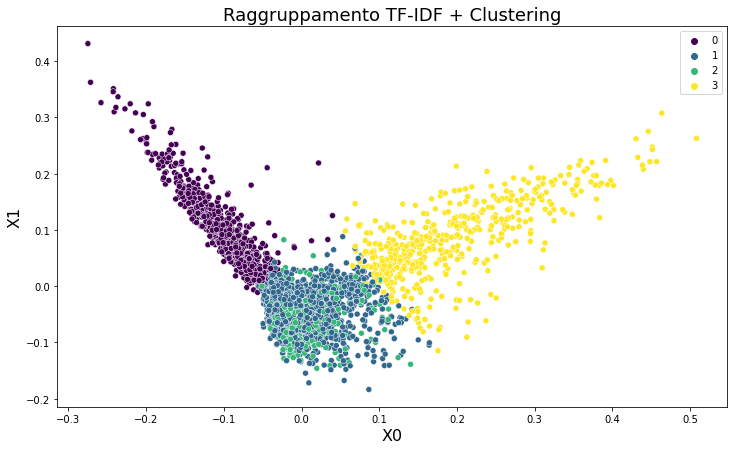

In [35]:
from sklearn.decomposition import PCA
import seaborn as sns
def plot_clusters(X,clusters):
    pca = PCA(n_components=2)
    # pass X to the pca
    pca_vecs = pca.fit_transform(X)
    # save the two dimensions in x0 and x1
    x0 = pca_vecs[:, 0]
    x1 = pca_vecs[:, 1]
    
    plt.figure(figsize=(12, 7))
    # set title
    plt.title("Raggruppamento TF-IDF + Clustering", fontdict={"fontsize": 18})
    # set axes names
    plt.xlabel("X0", fontdict={"fontsize": 16})
    plt.ylabel("X1", fontdict={"fontsize": 16})
    #  create scatter plot with seaborn, where hue is the class used to group the data
    sns.scatterplot(x=x0, y=x1, hue=clusters, palette="viridis")
    plt.savefig('cluster_gerarchico')
    plt.show()
    
plot_clusters(X,clusters)

In [36]:
def get_top_keywords(n_terms,clusters,X):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X).groupby(clusters).mean() # groups tf idf vector per cluster
    terms = list(X.columns)  # access to tf idf terms
    top_words_dict={}
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        top_words_dict[i]=set([terms[t] for t in np.argsort(r)[-n_terms:]])
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
    return top_words_dict
# X.columns

a=get_top_keywords(20,clusters,X)
a


Cluster 0
season,get,realli,funni,seri,enjoy,see,great,time,dvd,stori,like,charact,show,love,good,one,watch,film,movi

Cluster 1
littl,much,easi,take,batteri,dont,realli,tri,fit,time,would,need,good,great,well,like,get,one,work,use

Cluster 2
purchas,look,take,realli,one,get,clean,buy,love,would,recommend,like,well,qualiti,work,good,use,price,great,product

Cluster 3
batteri,button,would,charg,one,nice,use,like,good,great,cover,love,protector,iphon,fit,look,screen,protect,phone,case


{0: {'charact',
  'dvd',
  'enjoy',
  'film',
  'funni',
  'get',
  'good',
  'great',
  'like',
  'love',
  'movi',
  'one',
  'realli',
  'season',
  'see',
  'seri',
  'show',
  'stori',
  'time',
  'watch'},
 1: {'batteri',
  'dont',
  'easi',
  'fit',
  'get',
  'good',
  'great',
  'like',
  'littl',
  'much',
  'need',
  'one',
  'realli',
  'take',
  'time',
  'tri',
  'use',
  'well',
  'work',
  'would'},
 2: {'buy',
  'clean',
  'get',
  'good',
  'great',
  'like',
  'look',
  'love',
  'one',
  'price',
  'product',
  'purchas',
  'qualiti',
  'realli',
  'recommend',
  'take',
  'use',
  'well',
  'work',
  'would'},
 3: {'batteri',
  'button',
  'case',
  'charg',
  'cover',
  'fit',
  'good',
  'great',
  'iphon',
  'like',
  'look',
  'love',
  'nice',
  'one',
  'phone',
  'protect',
  'protector',
  'screen',
  'use',
  'would'}}

### Esecuzioni di algoritmi di clustering nelle varie categorie
Applichiamo gli algoritmi di clustering all'interno delle singole categorie

#### K-means

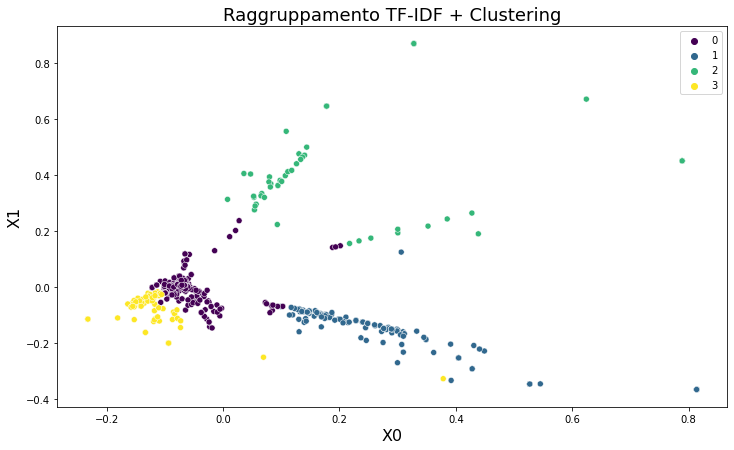


Cluster 0
must,well,expect,easi,small,better,light,price,decent,best,awesom,use,product,like,fit,qualiti,love,excel,perfect,nice

Cluster 1
buy,option,replac,tire,gift,short,goggl,qualiti,bag,money,grip,glove,tent,fit,littl,tool,price,product,knife,great

Cluster 2
bright,ok,cheap,broke,wonder,fine,describ,perfectli,tight,sharpen,state,uh,popular,design,expect,good,advertis,well,great,work

Cluster 3
hope,get,gun,realli,paddl,starter,around,stuff,holster,pair,need,money,bag,knife,deal,valu,qualiti,product,price,good


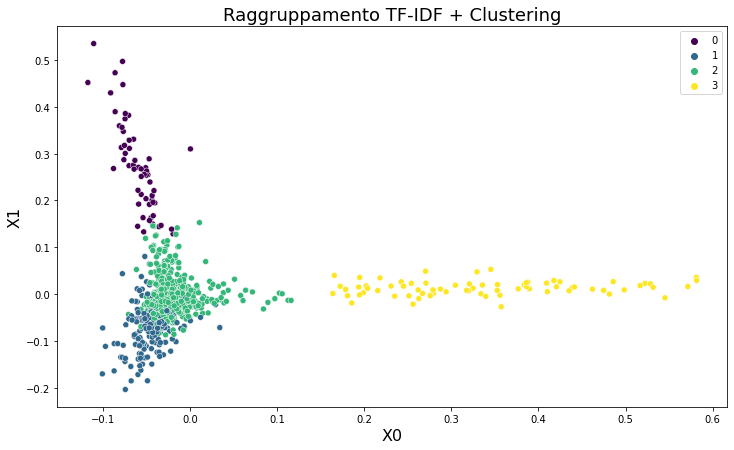


Cluster 0
front,get,patch,rear,work,stand,price,night,chain,great,road,use,tool,mount,tube,tire,rack,light,ride,bike

Cluster 1
yard,look,one,clean,stock,target,rail,well,fit,work,pistol,great,instal,use,shoot,sight,rifl,mount,scope,gun

Cluster 2
littl,comfort,nice,easi,bag,qualiti,price,buy,would,need,product,like,get,one,good,work,well,fit,great,use

Cluster 3
hand,want,grip,good,come,like,sharpen,small,carri,pocket,great,use,edg,steel,handl,knive,sharp,sheath,blade,knife


{0: {'bike',
  'chain',
  'front',
  'get',
  'great',
  'light',
  'mount',
  'night',
  'patch',
  'price',
  'rack',
  'rear',
  'ride',
  'road',
  'stand',
  'tire',
  'tool',
  'tube',
  'use',
  'work'},
 1: {'clean',
  'fit',
  'great',
  'gun',
  'instal',
  'look',
  'mount',
  'one',
  'pistol',
  'rail',
  'rifl',
  'scope',
  'shoot',
  'sight',
  'stock',
  'target',
  'use',
  'well',
  'work',
  'yard'},
 2: {'bag',
  'buy',
  'comfort',
  'easi',
  'fit',
  'get',
  'good',
  'great',
  'like',
  'littl',
  'need',
  'nice',
  'one',
  'price',
  'product',
  'qualiti',
  'use',
  'well',
  'work',
  'would'},
 3: {'blade',
  'carri',
  'come',
  'edg',
  'good',
  'great',
  'grip',
  'hand',
  'handl',
  'knife',
  'knive',
  'like',
  'pocket',
  'sharp',
  'sharpen',
  'sheath',
  'small',
  'steel',
  'use',
  'want'}}

In [37]:
X=df_tfidf_summary.iloc[:,2:]
X=X[df['sports & outodoors']==1]
clusters,SSE,_=get_clusters(X,4,method='k-means',distance='cosine')
plot_clusters(X,clusters)
get_top_keywords(20,clusters,X)

X=df_tfidf_review.iloc[:,2:]
X=X[df['sports & outodoors']==1]
clusters,SSE,_=get_clusters(X,4,method='k-means',distance='cosine')
plot_clusters(X,clusters)
get_top_keywords(20,clusters,X)

#film & TV	cellulari e accessori	salute e cura della persona

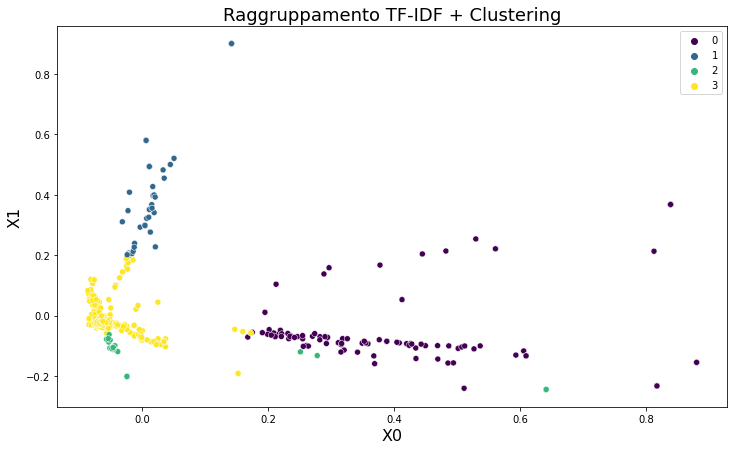


Cluster 0
bore,seen,christma,classic,disney,remak,famili,year,bad,excel,worst,one,fun,ever,best,funni,awesom,great,good,movi

Cluster 1
wisdom,vincent,expect,dvd,gift,collect,western,nostalgia,overdirect,prequel,elementari,seller,stori,entertain,seri,cast,show,season,film,great

Cluster 2
potter,creat,friendship,look,sacrif,zombi,last,selfdiscoveri,80,daughter,em,divert,roseann,scoobydoo,soa,stori,seri,show,movi,love

Cluster 3
entertain,comedi,star,season,like,funni,expect,watch,fun,enjoy,dvd,excel,show,time,one,better,classic,best,good,film


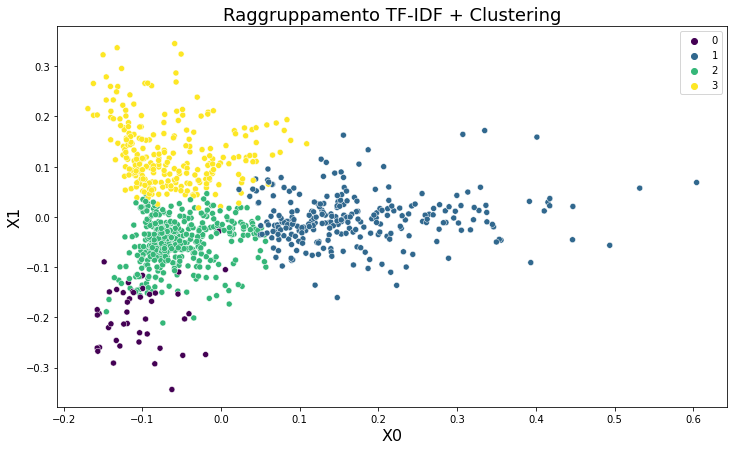


Cluster 0
go,start,one,four,first,releas,two,like,end,dvd,tv,hook,wait,see,charact,episod,watch,seri,show,season

Cluster 1
charact,end,act,would,famili,old,best,seen,stori,funni,great,time,see,enjoy,one,like,love,good,watch,movi

Cluster 2
anim,see,funni,set,time,episod,get,realli,charact,movi,great,good,like,love,stori,one,seri,watch,dvd,show

Cluster 3
perform,act,well,horror,dvd,actor,see,make,like,play,great,good,scene,stori,time,watch,one,charact,movi,film


{0: {'charact',
  'dvd',
  'end',
  'episod',
  'first',
  'four',
  'go',
  'hook',
  'like',
  'one',
  'releas',
  'season',
  'see',
  'seri',
  'show',
  'start',
  'tv',
  'two',
  'wait',
  'watch'},
 1: {'act',
  'best',
  'charact',
  'end',
  'enjoy',
  'famili',
  'funni',
  'good',
  'great',
  'like',
  'love',
  'movi',
  'old',
  'one',
  'see',
  'seen',
  'stori',
  'time',
  'watch',
  'would'},
 2: {'anim',
  'charact',
  'dvd',
  'episod',
  'funni',
  'get',
  'good',
  'great',
  'like',
  'love',
  'movi',
  'one',
  'realli',
  'see',
  'seri',
  'set',
  'show',
  'stori',
  'time',
  'watch'},
 3: {'act',
  'actor',
  'charact',
  'dvd',
  'film',
  'good',
  'great',
  'horror',
  'like',
  'make',
  'movi',
  'one',
  'perform',
  'play',
  'scene',
  'see',
  'stori',
  'time',
  'watch',
  'well'}}

In [38]:
X=df_tfidf_summary.iloc[:,2:]
X=X[df['film & TV']==1]
clusters,SSE,_=get_clusters(X,4,method='k-means',distance='cosine')
plot_clusters(X,clusters)
get_top_keywords(20,clusters,X)

X=df_tfidf_review.iloc[:,2:]
X=X[df['film & TV']==1]
clusters,SSE,_=get_clusters(X,4,method='k-means',distance='cosine')
plot_clusters(X,clusters)
get_top_keywords(20,clusters,X)

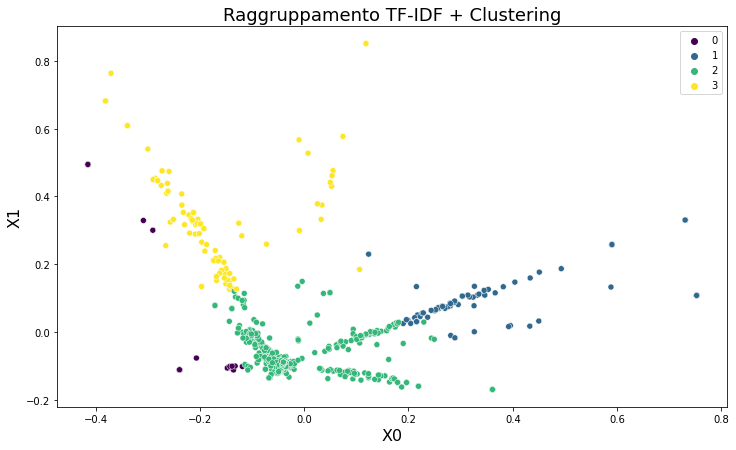


Cluster 0
fall,fairer,fairli,fair,expect,im,quit,new,elago,absolut,phone,headset,thing,otterbox,wife,dock,spigen,boyfriend,case,love

Cluster 1
charger,cabl,time,money,buy,headset,sound,deal,gift,replac,fit,look,qualiti,cord,screen,protector,price,work,product,great

Cluster 2
great,use,well,qualiti,cute,ok,iphon,phone,batteri,charger,like,excel,product,awesom,perfect,fit,protect,nice,work,good

Cluster 3
tough,ipod,ever,excel,fit,s4,sturdi,awesom,pretti,galaxi,look,protect,cute,iphon,phone,best,great,good,nice,case


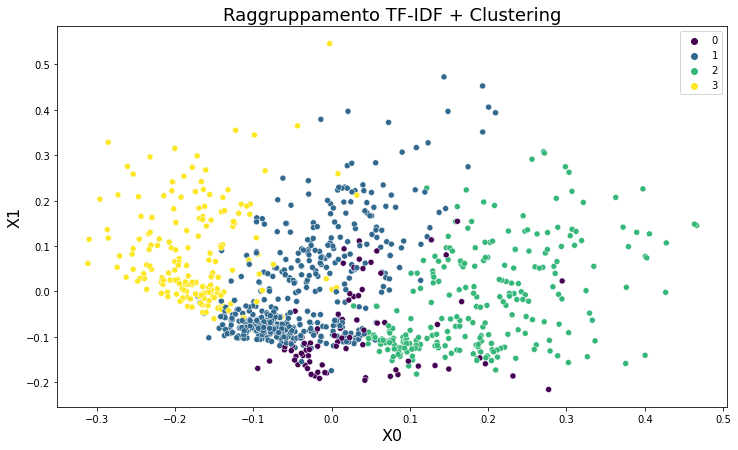


Cluster 0
touch,smooth,like,would,work,easi,scratch,get,great,one,instal,good,appli,clear,case,protect,bubbl,phone,protector,screen

Cluster 1
realli,bought,would,nice,cover,headset,like,good,well,love,product,get,look,fit,iphon,great,use,one,work,phone

Cluster 2
drop,otterbox,would,well,use,color,one,cover,nice,good,button,great,like,love,iphon,fit,look,protect,phone,case

Cluster 3
galaxi,would,iphon,product,need,cabl,samsung,great,power,one,port,use,plug,work,usb,devic,phone,charger,batteri,charg


{0: {'appli',
  'bubbl',
  'case',
  'clear',
  'easi',
  'get',
  'good',
  'great',
  'instal',
  'like',
  'one',
  'phone',
  'protect',
  'protector',
  'scratch',
  'screen',
  'smooth',
  'touch',
  'work',
  'would'},
 1: {'bought',
  'cover',
  'fit',
  'get',
  'good',
  'great',
  'headset',
  'iphon',
  'like',
  'look',
  'love',
  'nice',
  'one',
  'phone',
  'product',
  'realli',
  'use',
  'well',
  'work',
  'would'},
 2: {'button',
  'case',
  'color',
  'cover',
  'drop',
  'fit',
  'good',
  'great',
  'iphon',
  'like',
  'look',
  'love',
  'nice',
  'one',
  'otterbox',
  'phone',
  'protect',
  'use',
  'well',
  'would'},
 3: {'batteri',
  'cabl',
  'charg',
  'charger',
  'devic',
  'galaxi',
  'great',
  'iphon',
  'need',
  'one',
  'phone',
  'plug',
  'port',
  'power',
  'product',
  'samsung',
  'usb',
  'use',
  'work',
  'would'}}

In [39]:
X=df_tfidf_summary.iloc[:,2:]
X=X[df['cellulari e accessori']==1]
clusters,SSE,_=get_clusters(X,4,method='k-means',distance='cosine')
plot_clusters(X,clusters)
get_top_keywords(20,clusters,X)

X=df_tfidf_review.iloc[:,2:]
X=X[df['cellulari e accessori']==1]
clusters,SSE,_=get_clusters(X,4,method='k-means',distance='cosine')
plot_clusters(X,clusters)
get_top_keywords(20,clusters,X)

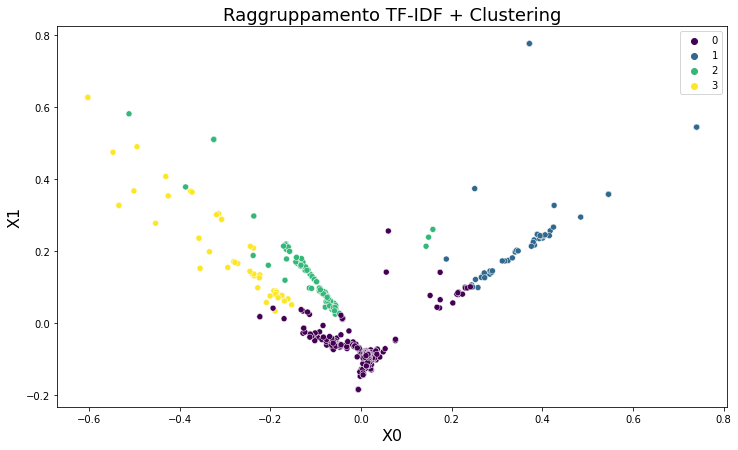


Cluster 0
far,amaz,job,star,much,clean,smell,like,supplement,help,effect,excel,stuff,better,nice,ok,best,use,love,good

Cluster 1
comparison,cheap,okay,wonder,advertis,seem,natur,wife,defin,weightloss,like,realli,describ,stuff,fine,doesnt,great,didnt,well,work

Cluster 2
deal,cloth,starter,valu,stuff,fair,good,scale,brush,energi,travel,leg,smell,buy,oil,batteri,razor,tast,price,great

Cluster 3
beauti,purs,care,dove,oralb,aw,huge,reliabl,brilliant,awsom,nice,anoth,better,review,love,price,excel,great,good,product


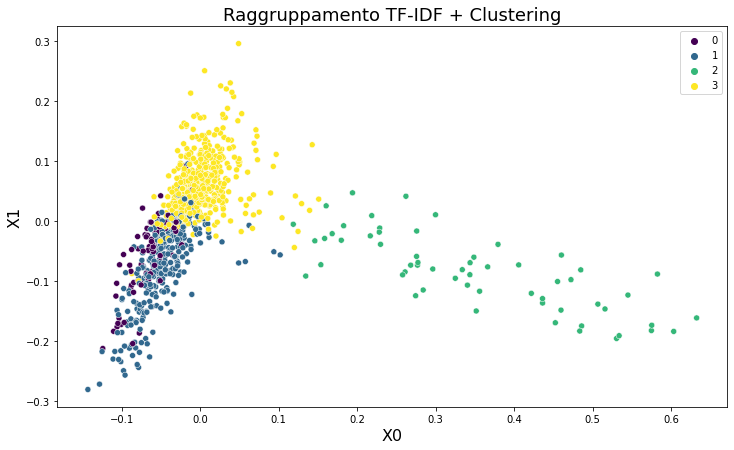


Cluster 0
would,bar,get,supplement,one,gummi,sweet,bad,oil,eat,great,mix,take,tri,like,protein,flavor,vitamin,drink,tast

Cluster 1
would,vitamin,time,price,notic,good,energi,pill,like,pain,tri,recommend,effect,use,day,work,supplement,help,take,product

Cluster 2
leg,feel,face,beard,clean,like,get,hair,time,braun,electr,good,cream,tri,soap,use,blade,shaver,razor,shave

Cluster 3
time,keep,realli,dont,price,would,need,batteri,love,much,good,smell,well,like,great,get,one,clean,work,use


{0: {'bad',
  'bar',
  'drink',
  'eat',
  'flavor',
  'get',
  'great',
  'gummi',
  'like',
  'mix',
  'oil',
  'one',
  'protein',
  'supplement',
  'sweet',
  'take',
  'tast',
  'tri',
  'vitamin',
  'would'},
 1: {'day',
  'effect',
  'energi',
  'good',
  'help',
  'like',
  'notic',
  'pain',
  'pill',
  'price',
  'product',
  'recommend',
  'supplement',
  'take',
  'time',
  'tri',
  'use',
  'vitamin',
  'work',
  'would'},
 2: {'beard',
  'blade',
  'braun',
  'clean',
  'cream',
  'electr',
  'face',
  'feel',
  'get',
  'good',
  'hair',
  'leg',
  'like',
  'razor',
  'shave',
  'shaver',
  'soap',
  'time',
  'tri',
  'use'},
 3: {'batteri',
  'clean',
  'dont',
  'get',
  'good',
  'great',
  'keep',
  'like',
  'love',
  'much',
  'need',
  'one',
  'price',
  'realli',
  'smell',
  'time',
  'use',
  'well',
  'work',
  'would'}}

In [40]:
X=df_tfidf_summary.iloc[:,2:]
X=X[df['salute e cura della persona']==1]
clusters,SSE,_=get_clusters(X,4,method='k-means',distance='cosine')
plot_clusters(X,clusters)
get_top_keywords(20,clusters,X)

X=df_tfidf_review.iloc[:,2:]
X=X[df['salute e cura della persona']==1]
clusters,SSE,_=get_clusters(X,4,method='k-means',distance='cosine')
plot_clusters(X,clusters)
get_top_keywords(20,clusters,X)

#### Bisecting K-means

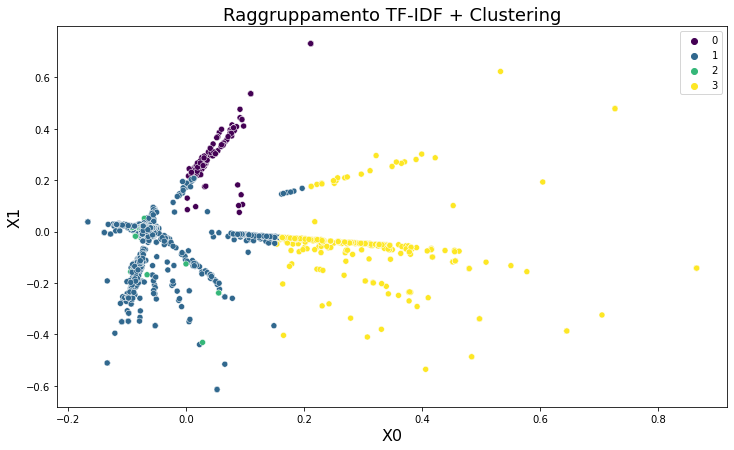


Cluster 0
champ,look,expect,cheap,okay,stuff,wonder,enough,excel,realli,perfectli,like,good,didnt,doesnt,describ,advertis,fine,well,work

Cluster 1
great,price,expect,star,one,fit,better,ok,use,qualiti,perfect,like,awesom,movi,best,case,excel,product,love,good

Cluster 2
putter,realli,phone,price,good,littl,cheap,horror,bright,glove,charger,idea,pretti,scent,look,pump,product,fit,case,nice

Cluster 3
season,look,tast,film,deal,gift,money,tool,buy,good,qualiti,littl,fit,knife,movi,case,price,work,product,great


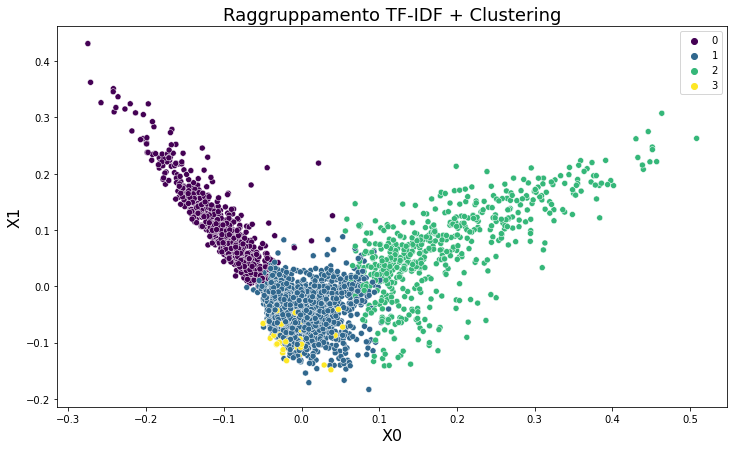


Cluster 0
season,act,realli,funni,seri,enjoy,great,see,dvd,time,show,stori,like,charact,love,good,one,watch,film,movi

Cluster 1
love,dont,tri,buy,take,realli,fit,time,need,price,would,get,well,good,like,one,product,great,work,use

Cluster 2
would,work,nice,good,one,like,cover,great,use,love,protector,charg,fit,look,batteri,iphon,screen,protect,phone,case

Cluster 3
one,sharp,like,clean,get,braun,trimmer,electr,cream,knife,time,good,hair,tri,soap,use,shaver,blade,razor,shave


{0: {'act',
  'charact',
  'dvd',
  'enjoy',
  'film',
  'funni',
  'good',
  'great',
  'like',
  'love',
  'movi',
  'one',
  'realli',
  'season',
  'see',
  'seri',
  'show',
  'stori',
  'time',
  'watch'},
 1: {'buy',
  'dont',
  'fit',
  'get',
  'good',
  'great',
  'like',
  'love',
  'need',
  'one',
  'price',
  'product',
  'realli',
  'take',
  'time',
  'tri',
  'use',
  'well',
  'work',
  'would'},
 2: {'batteri',
  'case',
  'charg',
  'cover',
  'fit',
  'good',
  'great',
  'iphon',
  'like',
  'look',
  'love',
  'nice',
  'one',
  'phone',
  'protect',
  'protector',
  'screen',
  'use',
  'work',
  'would'},
 3: {'blade',
  'braun',
  'clean',
  'cream',
  'electr',
  'get',
  'good',
  'hair',
  'knife',
  'like',
  'one',
  'razor',
  'sharp',
  'shave',
  'shaver',
  'soap',
  'time',
  'tri',
  'trimmer',
  'use'}}

In [41]:
X=df_tfidf_summary.iloc[:,2:]
#X=X[df['sports & outodoors']==1]
clusters,SSE,_=get_clusters(X,4,method='BisectingKMeans',distance='cosine')
plot_clusters(X,clusters)
get_top_keywords(20,clusters,X)

X=df_tfidf_review.iloc[:,2:]
#X=X[df['sports & outodoors']==1]
clusters,SSE,_=get_clusters(X,4,method='BisectingKMeans',distance='cosine')
plot_clusters(X,clusters)
get_top_keywords(20,clusters,X)


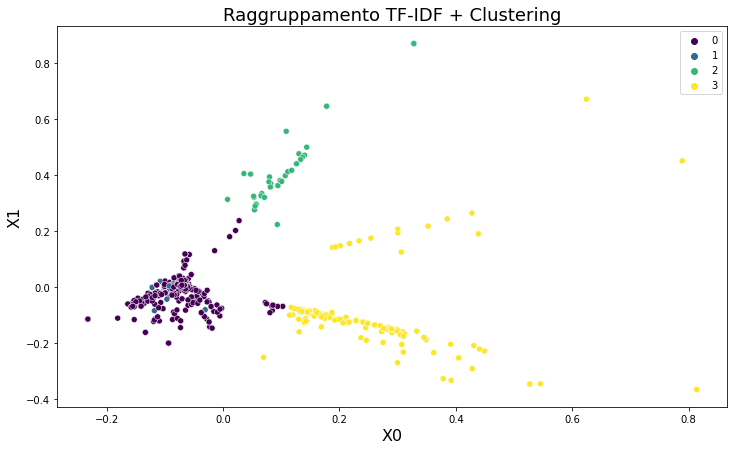


Cluster 0
expect,easi,money,light,better,small,decent,knife,best,awesom,use,fit,like,price,love,product,qualiti,excel,perfect,good

Cluster 1
rifl,inexpens,dot,pretti,golf,bipod,beginn,knife,mount,grip,surpris,loud,jersey,hat,putter,cheap,glove,fit,pump,nice

Cluster 2
pricey,youd,champ,ammo,ok,cheap,wonder,fine,describ,perfectli,tight,sharpen,state,uh,popular,advertis,expect,good,well,work

Cluster 3
replac,tire,gift,short,goggl,watch,bag,money,qualiti,grip,glove,tent,littl,fit,tool,price,product,knife,work,great


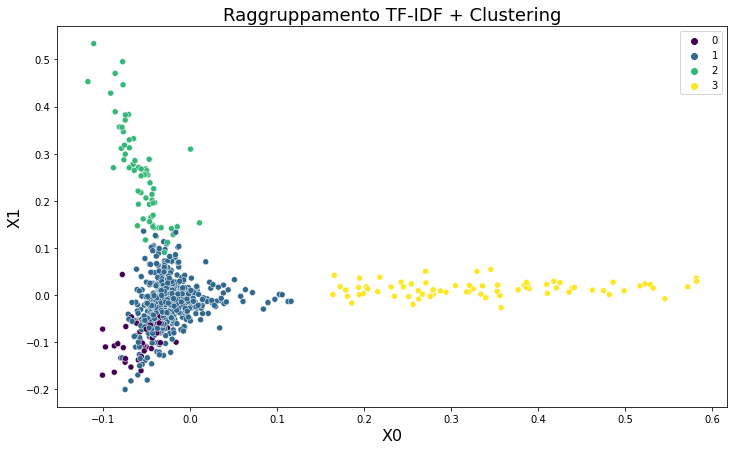


Cluster 0
fit,zero,go,22,ar,great,utg,rail,hold,use,ring,rang,rifl,optic,sight,shoot,target,yard,mount,scope

Cluster 1
bag,nice,look,buy,easi,price,qualiti,need,would,gun,like,product,get,one,good,well,work,fit,great,use

Cluster 2
patch,need,stand,price,rear,get,work,one,great,mount,road,tube,use,tire,tool,chain,rack,light,ride,bike

Cluster 3
hand,want,grip,good,come,like,sharpen,small,carri,pocket,great,use,edg,steel,handl,knive,sharp,sheath,blade,knife


{0: {'22',
  'ar',
  'fit',
  'go',
  'great',
  'hold',
  'mount',
  'optic',
  'rail',
  'rang',
  'rifl',
  'ring',
  'scope',
  'shoot',
  'sight',
  'target',
  'use',
  'utg',
  'yard',
  'zero'},
 1: {'bag',
  'buy',
  'easi',
  'fit',
  'get',
  'good',
  'great',
  'gun',
  'like',
  'look',
  'need',
  'nice',
  'one',
  'price',
  'product',
  'qualiti',
  'use',
  'well',
  'work',
  'would'},
 2: {'bike',
  'chain',
  'get',
  'great',
  'light',
  'mount',
  'need',
  'one',
  'patch',
  'price',
  'rack',
  'rear',
  'ride',
  'road',
  'stand',
  'tire',
  'tool',
  'tube',
  'use',
  'work'},
 3: {'blade',
  'carri',
  'come',
  'edg',
  'good',
  'great',
  'grip',
  'hand',
  'handl',
  'knife',
  'knive',
  'like',
  'pocket',
  'sharp',
  'sharpen',
  'sheath',
  'small',
  'steel',
  'use',
  'want'}}

In [42]:
X=df_tfidf_summary.iloc[:,2:]
X=X[df['sports & outodoors']==1]
clusters,SSE,_=get_clusters(X,4,method='BisectingKMeans',distance='cosine')
plot_clusters(X,clusters)
get_top_keywords(20,clusters,X)

X=df_tfidf_review.iloc[:,2:]
X=X[df['sports & outodoors']==1]
clusters,SSE,_=get_clusters(X,4,method='BisectingKMeans',distance='cosine')
plot_clusters(X,clusters)
get_top_keywords(20,clusters,X)


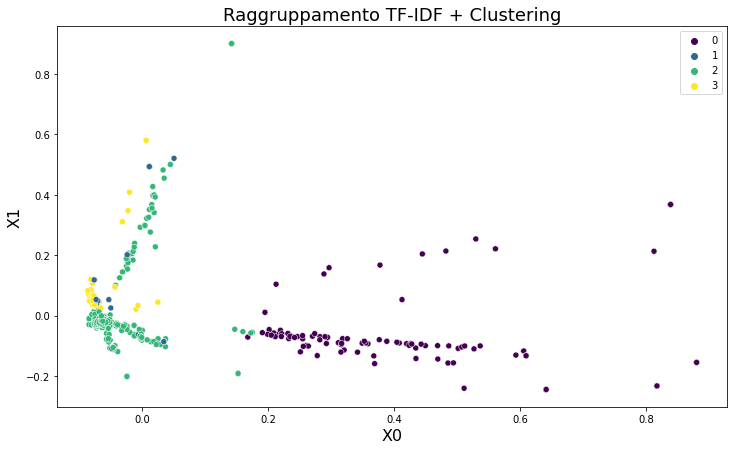


Cluster 0
christma,classic,disney,remak,famili,year,bad,excel,power,worst,one,fun,ever,best,love,funni,awesom,great,good,movi

Cluster 1
mentalist,4th,worst,nessman,thrill,next,best,buffi,denzel,laredo,well,heavi,bring,one,still,love,good,great,season,show

Cluster 2
star,comedi,one,enjoy,like,fun,seri,watch,entertain,excel,funni,expect,better,classic,time,dvd,best,good,love,great

Cluster 3
star,disast,awesom,act,vampir,vincent,pointless,worth,seen,final,classic,fun,anoth,good,one,best,horror,noir,great,film


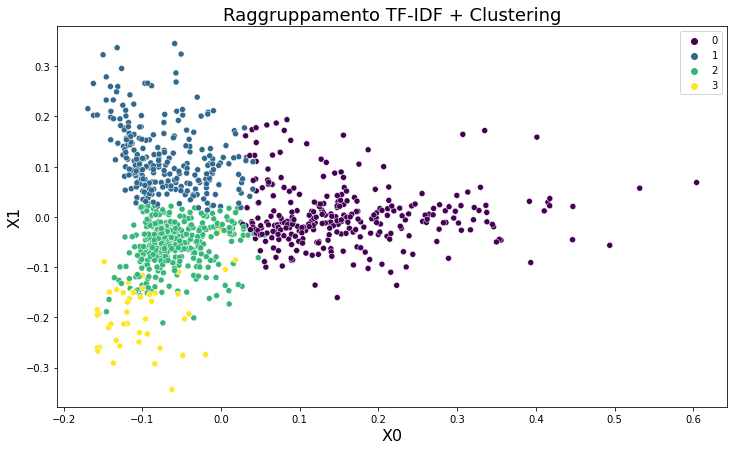


Cluster 0
would,old,famili,end,act,best,seen,film,stori,funni,great,see,time,enjoy,one,like,love,good,watch,movi

Cluster 1
well,dvd,love,perform,actor,horror,see,make,great,like,play,good,scene,watch,stori,time,one,charact,movi,film

Cluster 2
best,movi,time,set,funni,see,realli,episod,get,charact,great,good,like,stori,love,one,watch,dvd,seri,show

Cluster 3
go,one,four,start,two,first,like,end,hook,dvd,wait,releas,see,tv,charact,episod,watch,seri,show,season


{0: {'act',
  'best',
  'end',
  'enjoy',
  'famili',
  'film',
  'funni',
  'good',
  'great',
  'like',
  'love',
  'movi',
  'old',
  'one',
  'see',
  'seen',
  'stori',
  'time',
  'watch',
  'would'},
 1: {'actor',
  'charact',
  'dvd',
  'film',
  'good',
  'great',
  'horror',
  'like',
  'love',
  'make',
  'movi',
  'one',
  'perform',
  'play',
  'scene',
  'see',
  'stori',
  'time',
  'watch',
  'well'},
 2: {'best',
  'charact',
  'dvd',
  'episod',
  'funni',
  'get',
  'good',
  'great',
  'like',
  'love',
  'movi',
  'one',
  'realli',
  'see',
  'seri',
  'set',
  'show',
  'stori',
  'time',
  'watch'},
 3: {'charact',
  'dvd',
  'end',
  'episod',
  'first',
  'four',
  'go',
  'hook',
  'like',
  'one',
  'releas',
  'season',
  'see',
  'seri',
  'show',
  'start',
  'tv',
  'two',
  'wait',
  'watch'}}

In [43]:
X=df_tfidf_summary.iloc[:,2:]
X=X[df['film & TV']==1]
clusters,SSE,_=get_clusters(X,4,method='BisectingKMeans',distance='cosine')
plot_clusters(X,clusters)
get_top_keywords(20,clusters,X)

X=df_tfidf_review.iloc[:,2:]
X=X[df['film & TV']==1]
clusters,SSE,_=get_clusters(X,4,method='BisectingKMeans',distance='cosine')
plot_clusters(X,clusters)
get_top_keywords(20,clusters,X)

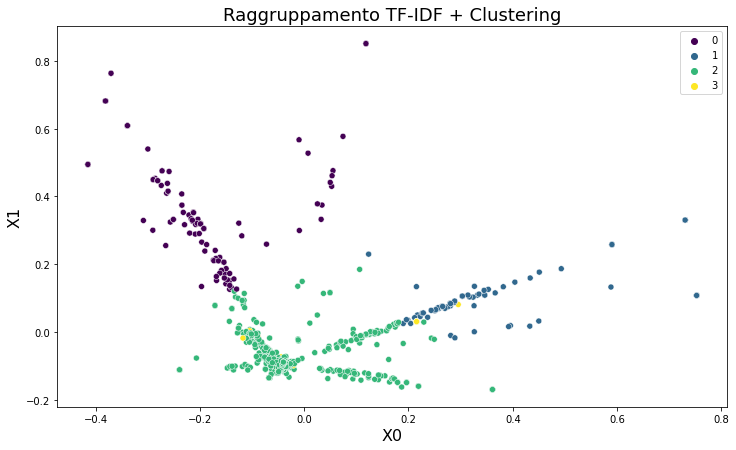


Cluster 0
ever,excel,absolut,fit,s4,sturdi,awesom,pretti,galaxi,look,protect,cute,iphon,love,phone,best,great,good,nice,case

Cluster 1
pen,phoneandroid,charger,cabl,time,money,buy,headset,sound,deal,gift,replac,fit,look,qualiti,cord,price,work,product,great

Cluster 2
great,well,qualiti,cute,ok,iphon,batteri,phone,charger,like,excel,product,awesom,perfect,fit,protect,nice,love,work,good

Cluster 3
failur,fair,fairer,fairli,fabl,featur,look,much,use,pretti,noth,ever,yet,like,best,good,great,expect,screen,protector


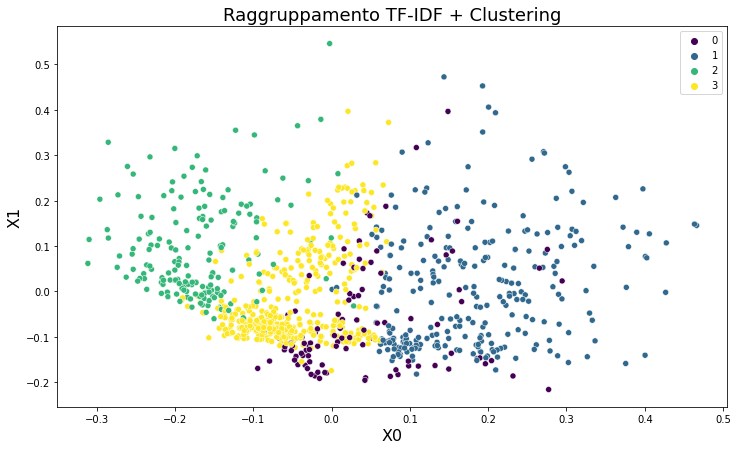


Cluster 0
side,like,scratch,work,would,fit,easi,get,instal,appli,good,great,one,clear,protect,bubbl,case,phone,protector,screen

Cluster 1
use,would,cute,color,well,one,drop,good,button,nice,great,like,cover,iphon,love,fit,look,protect,phone,case

Cluster 2
galaxi,time,iphon,product,cabl,need,great,samsung,power,one,port,use,work,plug,usb,devic,phone,charger,batteri,charg

Cluster 3
button,sound,love,bluetooth,bought,look,would,fit,like,get,product,well,good,headset,iphon,great,one,use,work,phone


{0: {'appli',
  'bubbl',
  'case',
  'clear',
  'easi',
  'fit',
  'get',
  'good',
  'great',
  'instal',
  'like',
  'one',
  'phone',
  'protect',
  'protector',
  'scratch',
  'screen',
  'side',
  'work',
  'would'},
 1: {'button',
  'case',
  'color',
  'cover',
  'cute',
  'drop',
  'fit',
  'good',
  'great',
  'iphon',
  'like',
  'look',
  'love',
  'nice',
  'one',
  'phone',
  'protect',
  'use',
  'well',
  'would'},
 2: {'batteri',
  'cabl',
  'charg',
  'charger',
  'devic',
  'galaxi',
  'great',
  'iphon',
  'need',
  'one',
  'phone',
  'plug',
  'port',
  'power',
  'product',
  'samsung',
  'time',
  'usb',
  'use',
  'work'},
 3: {'bluetooth',
  'bought',
  'button',
  'fit',
  'get',
  'good',
  'great',
  'headset',
  'iphon',
  'like',
  'look',
  'love',
  'one',
  'phone',
  'product',
  'sound',
  'use',
  'well',
  'work',
  'would'}}

In [44]:
X=df_tfidf_summary.iloc[:,2:]
X=X[df['cellulari e accessori']==1]
clusters,SSE,_=get_clusters(X,4,method='BisectingKMeans',distance='cosine')
plot_clusters(X,clusters)
get_top_keywords(20,clusters,X)

X=df_tfidf_review.iloc[:,2:]
X=X[df['cellulari e accessori']==1]
clusters,SSE,_=get_clusters(X,4,method='BisectingKMeans',distance='cosine')
plot_clusters(X,clusters)
get_top_keywords(20,clusters,X)

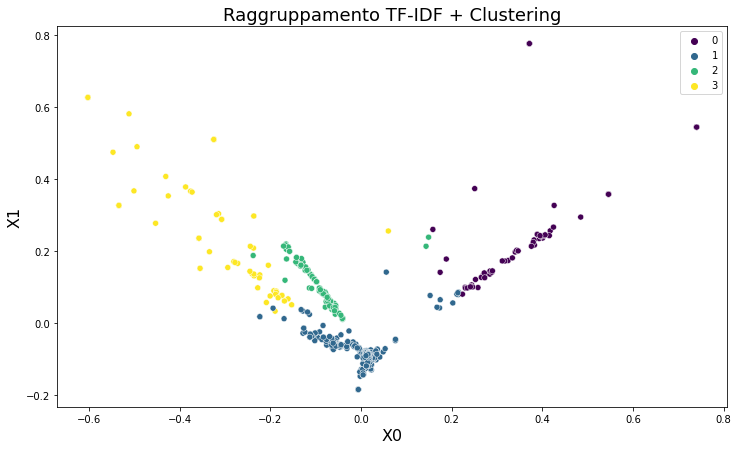


Cluster 0
wonder,seem,natur,wife,defin,weightloss,coupl,cant,enough,like,advertis,realli,describ,stuff,fine,doesnt,didnt,great,well,work

Cluster 1
far,clean,amaz,job,star,much,smell,like,supplement,help,effect,excel,stuff,better,nice,ok,best,use,love,good

Cluster 2
safeti,supplement,deal,cloth,starter,valu,stuff,scale,brush,energi,leg,travel,smell,buy,oil,batteri,razor,price,tast,great

Cluster 3
beauti,purs,care,dove,oralb,aw,huge,brilliant,reliabl,awsom,nice,anoth,better,review,love,excel,price,good,great,product


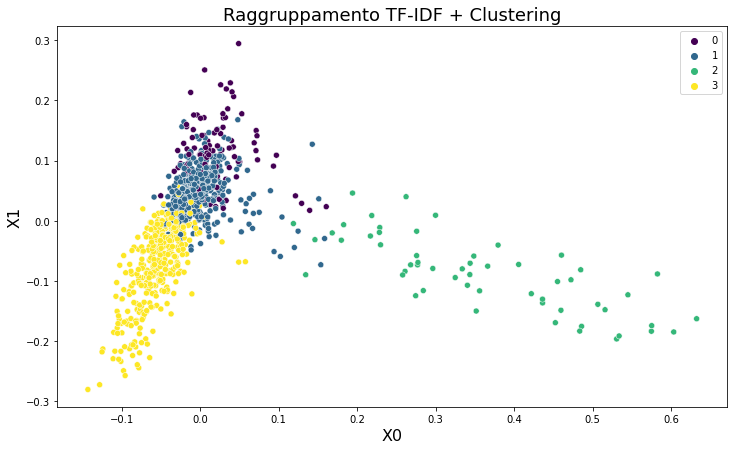


Cluster 0
oil,toothbrush,like,keep,love,job,well,work,dish,lip,product,get,cloth,great,skin,deterg,scent,use,smell,clean

Cluster 1
easi,seem,tri,price,last,realli,time,need,much,dont,would,batteri,great,good,well,like,get,one,work,use

Cluster 2
trimmer,lather,face,like,hair,beard,clean,get,time,tri,braun,good,electr,cream,soap,use,blade,shaver,razor,shave

Cluster 3
notic,price,energi,good,great,bottl,pill,use,recommend,work,effect,tri,day,like,vitamin,help,supplement,tast,take,product


{0: {'clean',
  'cloth',
  'deterg',
  'dish',
  'get',
  'great',
  'job',
  'keep',
  'like',
  'lip',
  'love',
  'oil',
  'product',
  'scent',
  'skin',
  'smell',
  'toothbrush',
  'use',
  'well',
  'work'},
 1: {'batteri',
  'dont',
  'easi',
  'get',
  'good',
  'great',
  'last',
  'like',
  'much',
  'need',
  'one',
  'price',
  'realli',
  'seem',
  'time',
  'tri',
  'use',
  'well',
  'work',
  'would'},
 2: {'beard',
  'blade',
  'braun',
  'clean',
  'cream',
  'electr',
  'face',
  'get',
  'good',
  'hair',
  'lather',
  'like',
  'razor',
  'shave',
  'shaver',
  'soap',
  'time',
  'tri',
  'trimmer',
  'use'},
 3: {'bottl',
  'day',
  'effect',
  'energi',
  'good',
  'great',
  'help',
  'like',
  'notic',
  'pill',
  'price',
  'product',
  'recommend',
  'supplement',
  'take',
  'tast',
  'tri',
  'use',
  'vitamin',
  'work'}}

In [45]:
X=df_tfidf_summary.iloc[:,2:]
X=X[df['salute e cura della persona']==1]
clusters,SSE,_=get_clusters(X,4,method='BisectingKMeans',distance='cosine')
plot_clusters(X,clusters)
get_top_keywords(20,clusters,X)

X=df_tfidf_review.iloc[:,2:]
X=X[df['salute e cura della persona']==1]
clusters,SSE,_=get_clusters(X,4,method='BisectingKMeans',distance='cosine')
plot_clusters(X,clusters)
get_top_keywords(20,clusters,X)

### Hierachical clustering

In [46]:
from sklearn.cluster import AgglomerativeClustering

def hierarchical_clustering(X,n_clusters,distance='euclidean', linkage='ward'):
    
    pca = PCA(n_components=20, random_state=42)
    # pass X to the pca
    X = pca.fit_transform(X) 
    
    clust_algo = AgglomerativeClustering(n_clusters=n_clusters, affinity=distance, linkage=linkage)
    clust_algo.fit(X)
    #SSE=clust_algo.inertia_
    clusters = clust_algo.labels_
    #mi manca la sse
    return clusters#,SSE
    

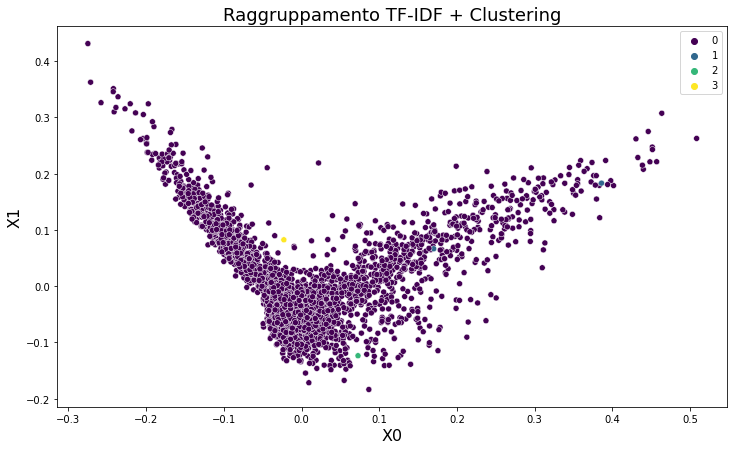


Cluster 0
price,film,fit,realli,look,time,would,love,product,well,get,phone,movi,case,like,good,work,one,great,use

Cluster 1
fasternow,good,work,look,case,fit,price,easi,put,film,around,protect,job,excel,screen,perfectli,note,phone,buy,great

Cluster 2
faucet,fatti,fatter,fatima,zzzquil,fatid,fathom,fatherinlaw,father,fatequot,fate,fatal,fatigu,work,well,love,last,job,regular,batteri

Cluster 3
faux,faust,faulti,fault,faucet,fatti,fatter,fastwhen,zzzquil,fatima,fatigu,fatid,fathom,fatherinlaw,father,fatequot,fate,fatal,fatso,good


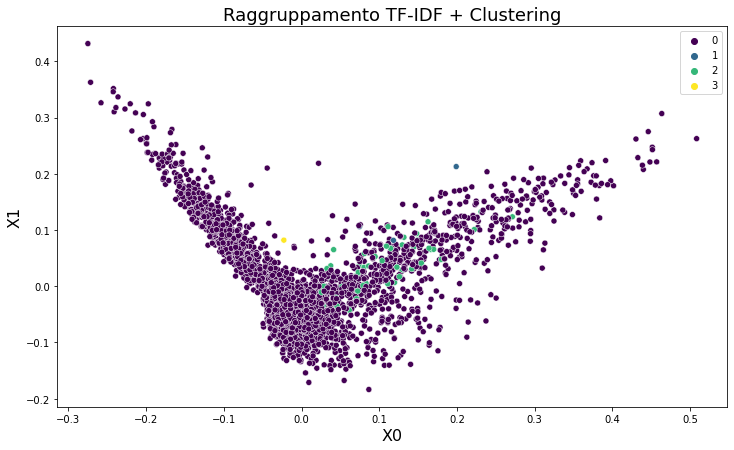


Cluster 0
price,film,fit,realli,look,would,time,love,product,get,well,phone,movi,case,like,good,work,one,great,use

Cluster 1
fatigu,fatherinlaw,fathom,fatid,fatal,product,good,phone,best,look,case,home,everyth,els,work,purchas,white,orang,iphon,love

Cluster 2
get,free,scratch,fit,would,dust,look,work,one,easi,good,instal,clear,protect,great,appli,phone,bubbl,protector,screen

Cluster 3
faux,faust,faulti,fault,faucet,fatti,fatter,fastwhen,zzzquil,fatima,fatigu,fatid,fathom,fatherinlaw,father,fatequot,fate,fatal,fatso,good


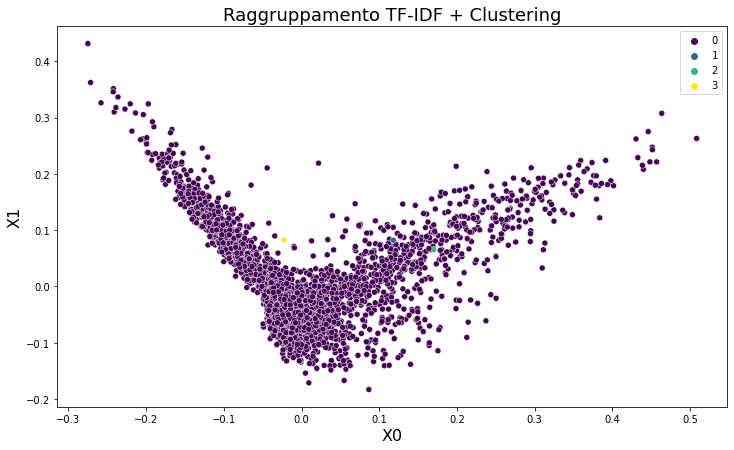


Cluster 0
price,film,fit,realli,look,time,would,love,product,well,get,movi,phone,case,like,good,work,one,great,use

Cluster 1
fatso,fat,fatima,zzzquil,fatid,fathom,fatherinlaw,father,fatequot,fate,fatigu,product,phone,best,iphon,home,everyth,els,work,love

Cluster 2
father,fate,fatal,fat,faucet,fastwhen,fault,faulti,fatequot,fatso,good,work,phone,price,easi,put,film,screen,great,buy

Cluster 3
faux,faust,faulti,fault,faucet,fatti,fatter,fastwhen,zzzquil,fatima,fatigu,fatid,fathom,fatherinlaw,father,fatequot,fate,fatal,fatso,good


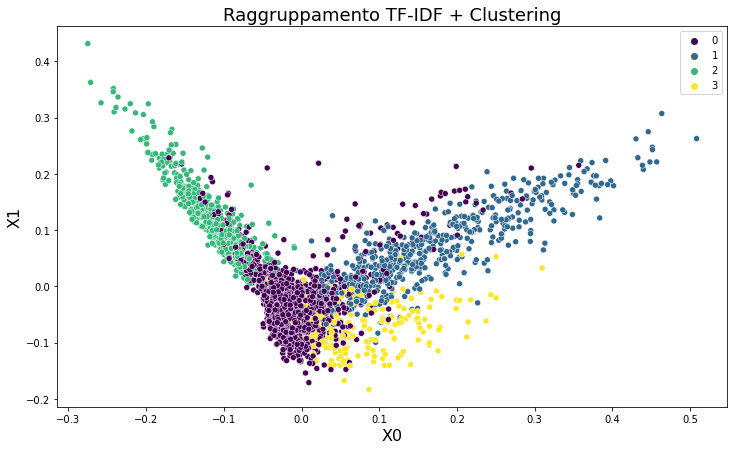


Cluster 0
much,need,fit,look,buy,take,realli,price,time,would,well,get,like,love,good,one,product,work,great,use

Cluster 1
would,well,get,work,nice,button,good,great,cover,one,like,use,iphon,look,fit,protector,protect,screen,phone,case

Cluster 2
well,scene,funni,dvd,realli,seri,enjoy,great,season,stori,see,time,charact,show,good,one,like,watch,film,movi

Cluster 3
product,last,samsung,good,iphon,great,need,port,power,cabl,one,usb,plug,work,use,devic,phone,charger,charg,batteri


{0: {'buy',
  'fit',
  'get',
  'good',
  'great',
  'like',
  'look',
  'love',
  'much',
  'need',
  'one',
  'price',
  'product',
  'realli',
  'take',
  'time',
  'use',
  'well',
  'work',
  'would'},
 1: {'button',
  'case',
  'cover',
  'fit',
  'get',
  'good',
  'great',
  'iphon',
  'like',
  'look',
  'nice',
  'one',
  'phone',
  'protect',
  'protector',
  'screen',
  'use',
  'well',
  'work',
  'would'},
 2: {'charact',
  'dvd',
  'enjoy',
  'film',
  'funni',
  'good',
  'great',
  'like',
  'movi',
  'one',
  'realli',
  'scene',
  'season',
  'see',
  'seri',
  'show',
  'stori',
  'time',
  'watch',
  'well'},
 3: {'batteri',
  'cabl',
  'charg',
  'charger',
  'devic',
  'good',
  'great',
  'iphon',
  'last',
  'need',
  'one',
  'phone',
  'plug',
  'port',
  'power',
  'product',
  'samsung',
  'usb',
  'use',
  'work'}}

In [47]:
X=df_tfidf_review.iloc[:,2:]
clusters=hierarchical_clustering(X,4,distance='euclidean',linkage='average')
plot_clusters(X,clusters)
get_top_keywords(20,clusters,X)

X=df_tfidf_review.iloc[:,2:]
clusters=hierarchical_clustering(X,4,linkage='complete')
plot_clusters(X,clusters)
get_top_keywords(20,clusters,X)

X=df_tfidf_review.iloc[:,2:]
clusters=hierarchical_clustering(X,4,linkage='single')
plot_clusters(X,clusters)
get_top_keywords(20,clusters,X)

X=df_tfidf_review.iloc[:,2:]
clusters=hierarchical_clustering(X,4)
plot_clusters(X,clusters)
get_top_keywords(20,clusters,X)

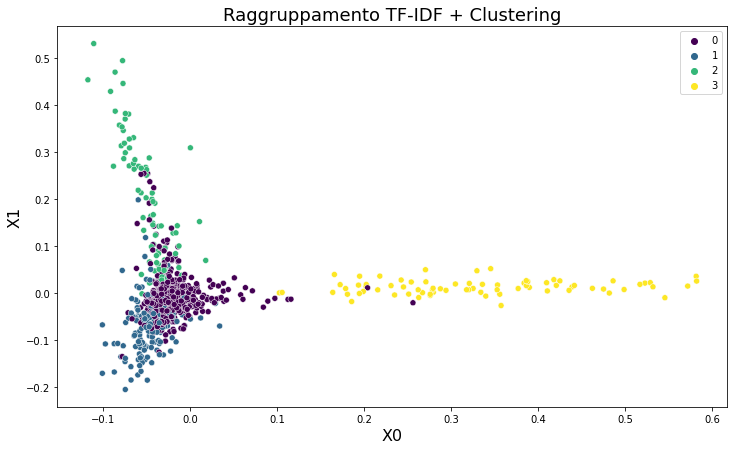


Cluster 0
keep,nice,comfort,easi,would,price,buy,need,qualiti,bag,like,product,one,get,good,fit,work,well,great,use

Cluster 1
nice,mirror,get,pistol,easi,one,great,well,work,target,fit,rail,instal,shoot,use,rifl,sight,mount,scope,gun

Cluster 2
rear,well,good,night,one,batteri,work,price,mount,great,tube,like,bright,fit,use,tire,rack,ride,light,bike

Cluster 3
box,come,want,grip,good,like,sharpen,great,small,carri,pocket,edg,use,steel,knive,handl,sharp,sheath,blade,knife


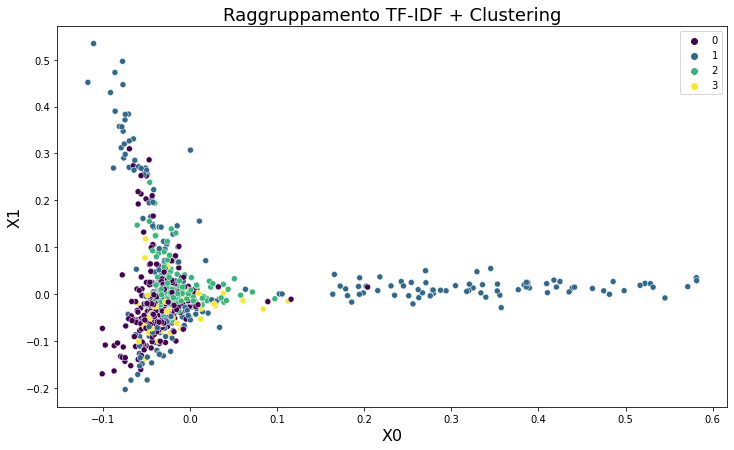


Cluster 0
look,qualiti,easi,ball,mag,like,price,good,product,kit,well,sight,one,light,bag,mount,work,scope,use,great

Cluster 1
one,would,hold,sheath,water,like,rack,holster,bottl,size,work,great,good,use,blade,well,gun,fit,bike,knife

Cluster 2
would,dont,easi,work,im,great,qualiti,product,like,day,need,price,good,chain,time,comfort,one,tool,get,use

Cluster 3
look,hand,use,love,glove,adjust,mat,bit,shoot,much,handl,great,easi,fit,nice,mirror,stock,grip,rifl,instal


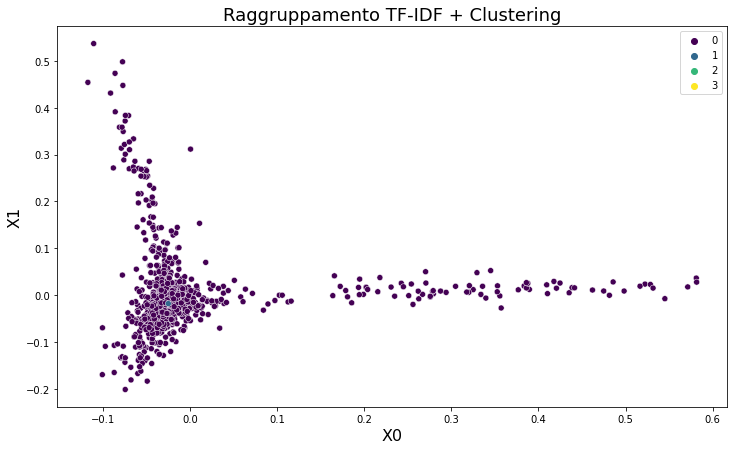


Cluster 0
light,easi,nice,buy,qualiti,would,need,bike,price,product,like,get,one,good,knife,well,work,fit,great,use

Cluster 1
fatal,feast,use,buy,far,ever,less,deal,youll,ok,smaller,wast,target,win,invent,brillianc,prize,shoud,spatter,pack

Cluster 2
bought,sure,thought,coupl,drop,wasnt,sort,tool,lock,practic,take,ammo,risk,repeat,wiggl,special,38,revolv,speedload,round

Cluster 3
fathom,fatid,fatherinlaw,father,fatequot,fate,fatal,fat,fastwhen,fatti,good,love,thing,keep,got,happi,friend,instal,import,safe


{0: {'bike',
  'buy',
  'easi',
  'fit',
  'get',
  'good',
  'great',
  'knife',
  'light',
  'like',
  'need',
  'nice',
  'one',
  'price',
  'product',
  'qualiti',
  'use',
  'well',
  'work',
  'would'},
 1: {'brillianc',
  'buy',
  'deal',
  'ever',
  'far',
  'fatal',
  'feast',
  'invent',
  'less',
  'ok',
  'pack',
  'prize',
  'shoud',
  'smaller',
  'spatter',
  'target',
  'use',
  'wast',
  'win',
  'youll'},
 2: {'38',
  'ammo',
  'bought',
  'coupl',
  'drop',
  'lock',
  'practic',
  'repeat',
  'revolv',
  'risk',
  'round',
  'sort',
  'special',
  'speedload',
  'sure',
  'take',
  'thought',
  'tool',
  'wasnt',
  'wiggl'},
 3: {'fastwhen',
  'fat',
  'fatal',
  'fate',
  'fatequot',
  'father',
  'fatherinlaw',
  'fathom',
  'fatid',
  'fatti',
  'friend',
  'good',
  'got',
  'happi',
  'import',
  'instal',
  'keep',
  'love',
  'safe',
  'thing'}}

In [48]:
X=df_tfidf_review.iloc[:,2:]
X=X[df['sports & outodoors']==1]
clusters=hierarchical_clustering(X,4,distance='cosine',linkage='average')
plot_clusters(X,clusters)
get_top_keywords(20,clusters,X)

X=df_tfidf_review.iloc[:,2:]
X=X[df['sports & outodoors']==1]
clusters=hierarchical_clustering(X,4,distance='cosine',linkage='complete')
plot_clusters(X,clusters)
get_top_keywords(20,clusters,X)

X=df_tfidf_review.iloc[:,2:]
X=X[df['sports & outodoors']==1]
clusters=hierarchical_clustering(X,4,distance='cosine',linkage='single')
plot_clusters(X,clusters)
get_top_keywords(20,clusters,X)

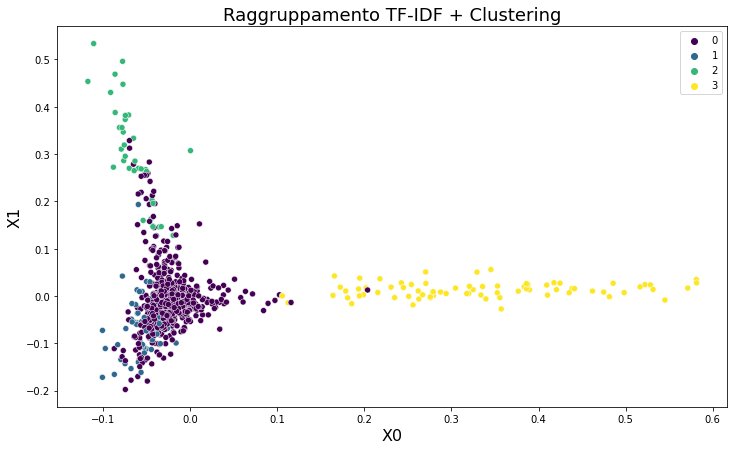


Cluster 0
bag,look,light,buy,price,qualiti,would,easi,need,gun,product,like,get,one,good,well,work,fit,great,use

Cluster 1
yard,ar,ring,hold,target,well,work,rang,got,fit,shoot,rifl,nice,utg,optic,use,great,rail,mount,scope

Cluster 2
work,light,price,buy,hand,hardwar,road,great,lock,well,patch,mount,rear,stand,use,tube,ride,tire,rack,bike

Cluster 3
want,grip,come,hand,good,like,sharpen,small,carri,pocket,use,great,edg,steel,knive,handl,sharp,sheath,blade,knife


{0: {'bag',
  'buy',
  'easi',
  'fit',
  'get',
  'good',
  'great',
  'gun',
  'light',
  'like',
  'look',
  'need',
  'one',
  'price',
  'product',
  'qualiti',
  'use',
  'well',
  'work',
  'would'},
 1: {'ar',
  'fit',
  'got',
  'great',
  'hold',
  'mount',
  'nice',
  'optic',
  'rail',
  'rang',
  'rifl',
  'ring',
  'scope',
  'shoot',
  'target',
  'use',
  'utg',
  'well',
  'work',
  'yard'},
 2: {'bike',
  'buy',
  'great',
  'hand',
  'hardwar',
  'light',
  'lock',
  'mount',
  'patch',
  'price',
  'rack',
  'rear',
  'ride',
  'road',
  'stand',
  'tire',
  'tube',
  'use',
  'well',
  'work'},
 3: {'blade',
  'carri',
  'come',
  'edg',
  'good',
  'great',
  'grip',
  'hand',
  'handl',
  'knife',
  'knive',
  'like',
  'pocket',
  'sharp',
  'sharpen',
  'sheath',
  'small',
  'steel',
  'use',
  'want'}}

In [49]:
X=df_tfidf_review.iloc[:,2:]
X=X[df['sports & outodoors']==1]
clusters=hierarchical_clustering(X,4)
plot_clusters(X,clusters)
get_top_keywords(20,clusters,X)

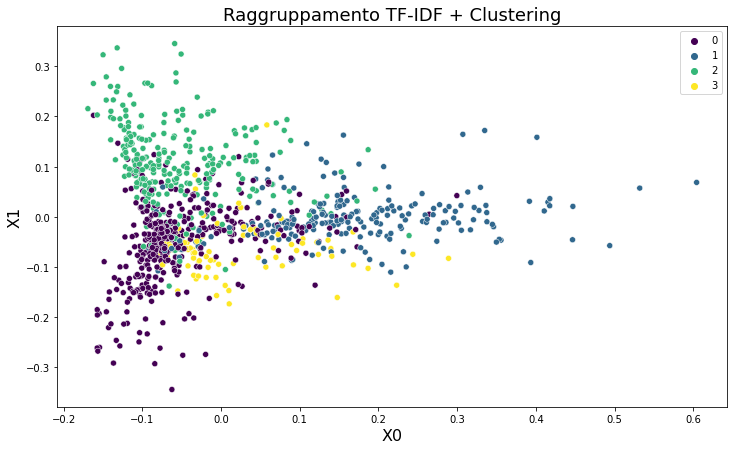


Cluster 0
enjoy,good,film,set,anim,charact,time,get,great,love,episod,watch,like,one,stori,season,movi,seri,show,dvd

Cluster 1
get,make,want,famili,great,go,end,would,best,seen,charact,time,enjoy,one,like,see,love,watch,good,movi

Cluster 2
perform,first,part,plot,see,make,great,like,play,well,stori,good,watch,time,scene,one,charact,act,movi,film

Cluster 3
old,kid,action,lot,thought,tv,video,alway,stori,collect,love,realli,fun,one,good,like,great,movi,funni,watch


{0: {'anim',
  'charact',
  'dvd',
  'enjoy',
  'episod',
  'film',
  'get',
  'good',
  'great',
  'like',
  'love',
  'movi',
  'one',
  'season',
  'seri',
  'set',
  'show',
  'stori',
  'time',
  'watch'},
 1: {'best',
  'charact',
  'end',
  'enjoy',
  'famili',
  'get',
  'go',
  'good',
  'great',
  'like',
  'love',
  'make',
  'movi',
  'one',
  'see',
  'seen',
  'time',
  'want',
  'watch',
  'would'},
 2: {'act',
  'charact',
  'film',
  'first',
  'good',
  'great',
  'like',
  'make',
  'movi',
  'one',
  'part',
  'perform',
  'play',
  'plot',
  'scene',
  'see',
  'stori',
  'time',
  'watch',
  'well'},
 3: {'action',
  'alway',
  'collect',
  'fun',
  'funni',
  'good',
  'great',
  'kid',
  'like',
  'lot',
  'love',
  'movi',
  'old',
  'one',
  'realli',
  'stori',
  'thought',
  'tv',
  'video',
  'watch'}}

In [50]:
X=df_tfidf_review.iloc[:,2:]
X=X[df['film & TV']==1]
clusters=hierarchical_clustering(X,4,distance='cosine',linkage='average')
plot_clusters(X,clusters)
get_top_keywords(20,clusters,X)

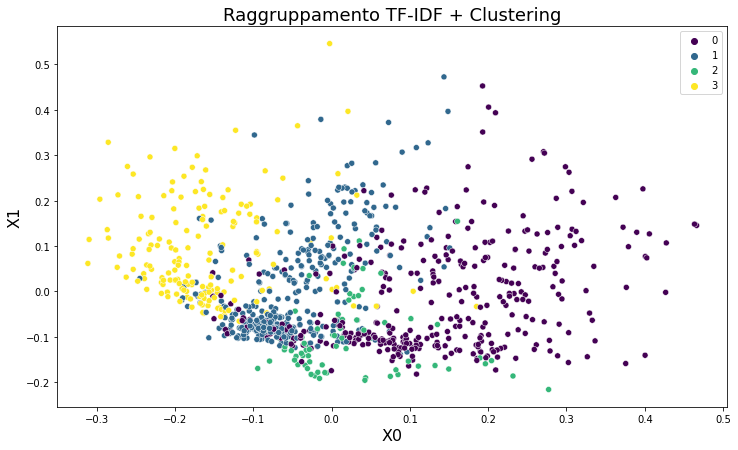


Cluster 0
bought,work,would,color,drop,button,well,one,use,good,like,great,nice,fit,love,look,iphon,protect,phone,case

Cluster 1
got,bluetooth,galaxi,bought,sound,would,like,button,well,product,get,good,fit,headset,cover,use,great,one,work,phone

Cluster 2
touch,stick,product,im,scratch,would,like,protect,great,get,good,clear,appli,instal,bubbl,one,case,phone,protector,screen

Cluster 3
case,wall,last,product,great,samsung,cabl,need,one,port,power,work,plug,use,usb,devic,phone,charger,charg,batteri


{0: {'bought',
  'button',
  'case',
  'color',
  'drop',
  'fit',
  'good',
  'great',
  'iphon',
  'like',
  'look',
  'love',
  'nice',
  'one',
  'phone',
  'protect',
  'use',
  'well',
  'work',
  'would'},
 1: {'bluetooth',
  'bought',
  'button',
  'cover',
  'fit',
  'galaxi',
  'get',
  'good',
  'got',
  'great',
  'headset',
  'like',
  'one',
  'phone',
  'product',
  'sound',
  'use',
  'well',
  'work',
  'would'},
 2: {'appli',
  'bubbl',
  'case',
  'clear',
  'get',
  'good',
  'great',
  'im',
  'instal',
  'like',
  'one',
  'phone',
  'product',
  'protect',
  'protector',
  'scratch',
  'screen',
  'stick',
  'touch',
  'would'},
 3: {'batteri',
  'cabl',
  'case',
  'charg',
  'charger',
  'devic',
  'great',
  'last',
  'need',
  'one',
  'phone',
  'plug',
  'port',
  'power',
  'product',
  'samsung',
  'usb',
  'use',
  'wall',
  'work'}}

In [51]:
X=df_tfidf_review.iloc[:,2:]
X=X[df['cellulari e accessori']==1]
clusters=hierarchical_clustering(X,4,distance='cosine',linkage='average')
plot_clusters(X,clusters)
get_top_keywords(20,clusters,X)

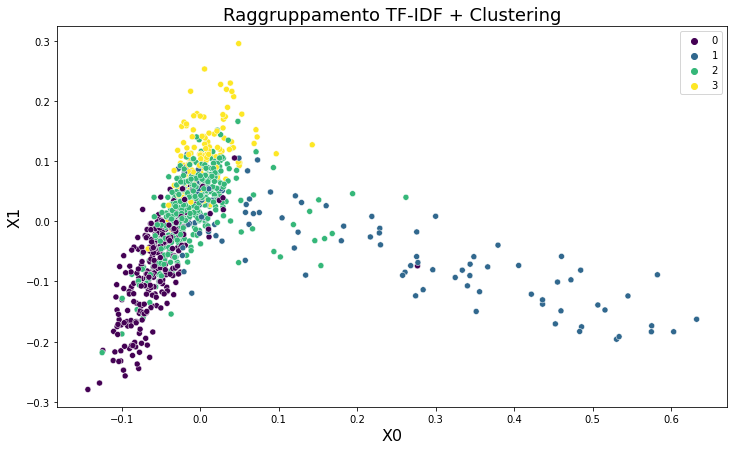


Cluster 0
drink,notic,price,effect,feel,recommend,day,tri,good,work,great,energi,use,help,like,oil,supplement,take,tast,product

Cluster 1
work,would,balm,soap,good,tri,face,like,cream,get,product,dri,shaver,use,skin,lip,blade,hair,razor,shave

Cluster 2
easi,much,recommend,price,day,need,would,help,good,tri,time,batteri,pain,great,like,well,get,one,work,use

Cluster 3
tide,dishwash,good,glass,dish,get,love,work,great,like,wash,deodor,product,deterg,stain,cloth,scent,use,clean,smell


{0: {'day',
  'drink',
  'effect',
  'energi',
  'feel',
  'good',
  'great',
  'help',
  'like',
  'notic',
  'oil',
  'price',
  'product',
  'recommend',
  'supplement',
  'take',
  'tast',
  'tri',
  'use',
  'work'},
 1: {'balm',
  'blade',
  'cream',
  'dri',
  'face',
  'get',
  'good',
  'hair',
  'like',
  'lip',
  'product',
  'razor',
  'shave',
  'shaver',
  'skin',
  'soap',
  'tri',
  'use',
  'work',
  'would'},
 2: {'batteri',
  'day',
  'easi',
  'get',
  'good',
  'great',
  'help',
  'like',
  'much',
  'need',
  'one',
  'pain',
  'price',
  'recommend',
  'time',
  'tri',
  'use',
  'well',
  'work',
  'would'},
 3: {'clean',
  'cloth',
  'deodor',
  'deterg',
  'dish',
  'dishwash',
  'get',
  'glass',
  'good',
  'great',
  'like',
  'love',
  'product',
  'scent',
  'smell',
  'stain',
  'tide',
  'use',
  'wash',
  'work'}}

In [52]:
X=df_tfidf_review.iloc[:,2:]
X=X[df['salute e cura della persona']==1]
clusters=hierarchical_clustering(X,4,distance='cosine',linkage='average')
plot_clusters(X,clusters)
get_top_keywords(20,clusters,X)

### DBSCAN

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from operator import itemgetter
from sklearn.decomposition import PCA
from PIL import Image 
import PIL 
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import preprocessing 
from sklearn.cluster import KMeans
from sklearn.cluster import BisectingKMeans

In [54]:
# stemming
def stemming(text):
    stem_text = [PorterStemmer().stem(word) for word in text]
    return stem_text

def stemm(text):
    return text.apply(lambda x: stemming(x))

In [55]:
#tutte le operazioni di preprocessing insieme
def preproc(df,stem=True):
    series=df['reviewText']
    text=series_to_lower(series)
    text=rem_stopwords(text)
    text=tokenize_series(text)
    if stem:
        text=stemm(text)
    else:
        text=lemmed_series(text)
    text=join_series(text)
    return vectorizer(text)

In [56]:
def dbscan_grid_search(X_data, lst, eps_space = [0.5],
                       min_samples_space = [5], min_clust = 4, max_clust = 12, max_noise=2000,c=4,pca=True):
    if pca:
        pca = PCA(n_components=c, random_state=42)
        X_data = pca.fit_transform(X_data) 
        X=X_data
        for eps_val in eps_space:
            for samples_val in min_samples_space:

                    db = DBSCAN(eps = eps_val,
                                         min_samples = samples_val,metric='cosine')

                    # fit_transform
                    clusters = db.fit_predict(X = X)

                    # Saving the number of clusters
                    n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
                    n_noise=list(clusters).count(-1)

                    # Appending the lst each time n_clusters criteria is reached
                    if n_clusters >= min_clust and n_clusters <= max_clust and n_noise<= max_noise:
                        score=metrics.silhouette_score(X_data, clusters, metric='cosine')
                        lst.append([eps_val, samples_val, n_clusters, n_noise, score])
                        
    else:
        for eps_val in eps_space:
                for samples_val in min_samples_space:

                    db = DBSCAN(eps = eps_val,
                                         min_samples = samples_val,metric='cosine')

                    # fit_transform
                    clusters = db.fit_predict(X = X_data)

                    # Saving the number of clusters
                    n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
                    n_noise=list(clusters).count(-1)

                    # Appending the lst each time n_clusters criteria is reached
                    if n_clusters >= min_clust and n_clusters <= max_clust and n_noise<= max_noise:
                        score=metrics.silhouette_score(X_data, clusters, metric='cosine')
                        lst.append([eps_val, samples_val, n_clusters, n_noise, score])

    print(f"""Search Complete. \nYour list is now of length {len(lst)}. """)

In [57]:
#funzione per fare il plot dei dati clusterizzati tramite dbscan

def get_view(cluster,X,df):
    pca = PCA(n_components=2, random_state=42)
    # pass X to the pca
    pca_vecs = pca.fit_transform(X)
    # save the two dimensions in x0, x1
    x0 = pca_vecs[:, 0]
    x1 = pca_vecs[:, 1]
    df['cluster'] = cluster
    df['x0'] = x0
    df['x1'] = x1
    # set image size
    plt.figure(figsize=(12, 7))
    # set title
    plt.title("Raggruppamento TF-IDF + DBSCAN", fontdict={"fontsize": 18})
    # set axes names
    plt.xlabel("X0", fontdict={"fontsize": 16})
    plt.ylabel("X1", fontdict={"fontsize": 16})
    #  create scatter plot with seaborn, where hue is the class used to group the data
    sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette="viridis")
    plt.savefig("boh.png",dpi=400) 
    plt.show()

In [58]:
#funzione per valutare i parametri scelti dalla grid search
def evaluation(eps, min_samples,X,df,components,pca=True):
    X_original=X
    if pca:
        pca = PCA(n_components=components, random_state=42)
        # pass X to the pca
        X = pca.fit_transform(X) 
    cluster = DBSCAN(eps=eps,min_samples=min_samples,metric='cosine').fit_predict(X)
    n_clusters = len(set(cluster)) - (1 if -1 in cluster else 0)
    n_noise = list(cluster).count(-1)
    score=metrics.silhouette_score(X, cluster, metric='cosine') 
    print("eps",eps,"min samples",min_samples,"\n")
    print("numero cluster",n_clusters,"numero punti rumore",n_noise,"score silhouette",score)
    get_view(cluster,X_original,df)
    get_top_keywords(20,cluster,X_original)

In [59]:
##Qui definiamo una funzione per fare grid search sui parametri da utilizzare nell'algoritmo DBSCAN.

#lst   = []
#dbscan_grid_search(X_data = X,
#                   lst = lst,eps_space=np.linspace(0.01,0.9,40), 
#                  min_samples_space=range(20,60),c=3
#                )
#lst=sorted(lst, key=itemgetter(len(lst[0])-1), reverse=True)
#lst

In [60]:
#df=clean(load('data.csv')) #importo dataset pulito
#df=dataset.copy()
X=preproc(df)

eps 0.054285714285714284 min samples 55 

numero cluster 4 numero punti rumore 317 score silhouette 0.47981466963524283


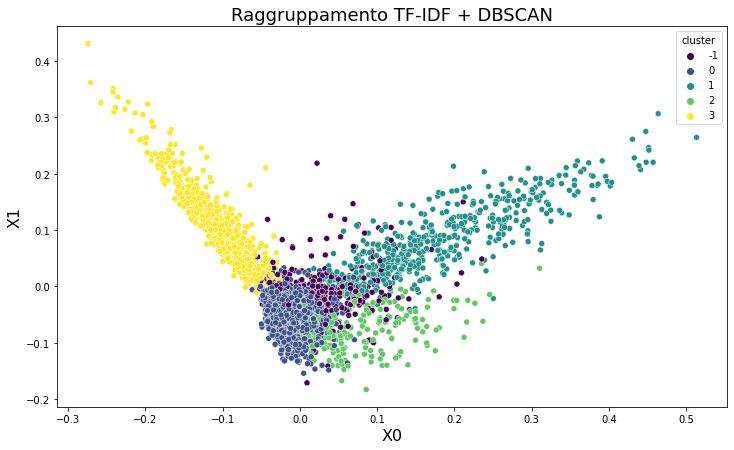


Cluster -1
product,iphon,well,would,price,easi,nice,fit,like,get,phone,look,case,screen,good,great,use,love,work,one

Cluster 0
much,recommend,littl,realli,buy,tri,need,time,take,would,price,good,one,get,like,well,product,great,work,use

Cluster 1
color,well,would,use,great,one,love,nice,button,good,like,cover,protector,iphon,look,fit,screen,protect,phone,case

Cluster 2
time,cabl,last,light,good,great,iphon,port,power,need,usb,one,plug,use,work,devic,phone,charger,charg,batteri

Cluster 3
act,realli,funni,get,seri,great,enjoy,dvd,see,time,stori,show,charact,like,love,good,one,watch,film,movi


In [61]:
evaluation(0.054285714285714284, 55,X,df,4)

# Implementazione applicazione business
Il nostro obiettivo è estrarre dal dataset delle informazioni utili per poter guidare il cliente nell'acquisto. La nostra idea è di permettere ad un utente di filtrare in maniera sequenziale il dataset per arrivare alla classe di prodotti specifica a cui è più interessato. I filtri sono delle parole chiave che descrivono in maniera efficace porzioni del dataset.

Per l'implementazione le funzioni chiave sono 
- n_cluster_search: è l'algoritmo utilizzato per il clustering
- view: la funzione per visualizzare i prodotti selezionati
- order: ordina i prodotti secondo il criterio scelto
- utility: estrae un valore predetto di utilità della recensione sulla base di una regressione lineare
- get_suggestions: è la funzione principale che implementa l'applicazione di business

In [62]:
def n_cluster_search(X,distance='cosine',random_state=0,n_iter=10):
    max_n_clusters=8
    i=1
    cond=True
    clusters,SSE,centers=get_clusters(X,i,distance=distance, random_state=random_state, n_iter=1)
    while(cond and i<=max_n_clusters):
        #print(i)
        clusters_k,SSE_k,centers_k=get_clusters(X,i,distance=distance, random_state=random_state, n_iter=n_iter)
        clusters_b,SSE_b,centers_b=get_clusters(X,i,method='BisectingKMeans',distance=distance, random_state=random_state, n_iter=n_iter)
        
        if SSE_k<SSE_b:
            cluster_appo=clusters_k
            SSE_appo=SSE_k
            centers_appo=centers_k
        else:
            cluster_appo=clusters_b
            SSE_appo=SSE_b
            centers_appo=centers_b
            
        if i<=2 or SSE-SSE_appo>3*delta_SSE/5:
            cond=True       
            delta_SSE=SSE-SSE_appo
            SSE=SSE_appo
            
        else:
            cond=False
            SSE=SSE_appo
        
        #print(set(cluster_appo))
        #print(SSE)
        i=i+1
    
            
    return cluster_appo, SSE,centers_appo
        

In [63]:
def view(util,dist,print_utils=True):
    if print_utils: print("Recensioni più utili:\n",util.head(),'\n')
    else: print("Recensioni più pertinenti:\n",dist.head(),'\n')

In [64]:
def order(data):
    df=data.copy()
    util=df.sort_values(by=['helpful','utility'],ascending=False)
    dist=df.sort_values(by=['distance'],ascending=False)
    return util,dist

In [65]:
def utility(data,components):
    df=data.copy()
    X=preproc(df)
    y=df['helpful']
    lr=reg(X,y,components)
    X_pca=pca(X,components)
    return lr.predict(X_pca)

In [66]:
def pca(original_X,n):
    X=original_X
    if n<=min(X.shape[1],X.shape[0]):
        pca=PCA(n_components=n, random_state=42)
        X=pca.fit_transform(X)
    return X

In [67]:
def reg(X_original,y,n_components,pos=True):
    X=X_original
    if pos:
        idx=[j for i,j in zip(y,range(len(y))) if i>0]
        X=X.iloc[idx]
        y=y[y>0] 
    X=pca(X,n_components)
    reg = LinearRegression().fit(X, y)
    #print("R2 SCORE: ",reg.score(X, y),'\n')
    return reg

In [68]:
def check_dim(df,n):
    stop=False
    X=preproc(df)
    y=df['helpful']
    idx=[j for i,j in zip(y,range(len(y))) if i>0]
    X=X.iloc[idx]
    y=y[y>0] 
    if not(n<=min(X.shape[1],X.shape[0])): stop=True
    return stop

In [69]:
def distance(df,center):
    X=preproc(df)
    if type(X)!= "numpy.ndarray": X=X.to_numpy()
    center=center.reshape(1, -1)
    return cosine_similarity(X,center)

In [70]:
def get_suggestions(df,components=43,print_utils=False):
    top_words_clust=[]
    while(True):
        try:
            X=preproc(df)
            try:
                X.drop(top_words_clust, axis=1, inplace=True)
            except:
                pass
            clusters, SSE, centers = n_cluster_search(X,distance='cosine',n_iter=1)
            top_words=get_top_keywords(1,clusters,X)
            print('\n')
            cluster=int(input())
            center=centers[cluster]
            if cluster==-1:
                view(s_utility,s_distance,print_utils)
                break
            top_words_clust=top_words_clust+list(top_words[cluster])
            
            df = df.assign(utility=utility(df,components))
            df = df.assign(distance=distance(df,center))
            s_utility,s_distance=order(df)
            df=df.iloc[X.index][clusters==cluster]
            
        except:
            view(s_utility,s_distance,print_utils)
            break
                
    

In [71]:
#df=clean(load('data.csv')) #importo dataset pulito
#df=dataset.copy()
#df=clean(df)
get_suggestions(df[df['salute e cura della persona']==1])


Cluster 0
use

Cluster 1
shave

Cluster 2
work

Cluster 3
take


3

Cluster 0
product

Cluster 1
tast

Cluster 2
work

Cluster 3
vitamin

Cluster 4
drink

Cluster 5
qualiti

Cluster 6
pain

Cluster 7
product


6
Recensioni più pertinenti:
           reviewerID        asin                     reviewerName  helpful  \
3132  A1X3JBFQ5H2RBH  B002RXZEEK            Jenn Reedy Jenn Reedy        5   
3128  A36EODDWRMBA74  B000PWGDZ4                           Debi S        3   
3743  A3H7NPNDMGLOU4  B0007A2E0W  Amazon Enthusiast The Lucky One       56   
3617  A18PG5PDYQCV2G  B005KSIGKI                  Brenda A Slater        0   
3856   A8LNMJEXUT2VB  B004P4FF20                    hp1480 hp1480       10   

                                             reviewText  overall  \
3132  ok product whole healthforc line incred got bo...      5.0   
3128  someon chronic pain spoke wmi back surgeon rea...      2.0   
3743  ive suffer rel mild case inattent add attent d...      5.0   
3617  love gummi v